# MINOR  2

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.losses import MeanSquaredLogarithmicError
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1)  Load the attached csv file.

In [2]:
data = pd.read_csv('/Users/parthkalathia/Desktop/Minor/train.csv')

In [3]:
data.shape

(23786, 60)

In [4]:
data.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,427.0,13.0,116.0,0.782609,1.0,0.925373,6.0,4.0,0.0,0.0,...,0.136364,0.8,-0.125000,-0.125000,-0.125000,0.375,-0.125,0.125,0.125,6077.0
1,178.0,6.0,232.0,0.620690,1.0,0.804687,8.0,6.0,1.0,0.0,...,0.136364,0.6,-0.166667,-0.200000,-0.100000,0.000,0.000,0.500,0.000,6186.0
2,604.0,9.0,219.0,0.648402,1.0,0.818966,4.0,1.0,0.0,1.0,...,0.100000,1.0,-0.269811,-0.666667,-0.071429,0.125,0.000,0.375,0.000,4987.0
3,452.0,14.0,126.0,0.698413,1.0,0.849315,5.0,4.0,0.0,1.0,...,0.136364,0.3,-0.400000,-0.500000,-0.300000,0.400,0.100,0.100,0.100,6470.0
4,357.0,12.0,383.0,0.518617,1.0,0.671296,9.0,4.0,1.0,0.0,...,0.214286,0.5,-0.180903,-0.400000,-0.100000,0.450,0.350,0.050,0.350,5865.0


In [5]:
x = data.iloc[::,0:-1:]

In [6]:
y = data.iloc[::,-1]

In [49]:
y

0        6077.0
1        6186.0
2        4987.0
3        6470.0
4        5865.0
          ...  
23781    7078.0
23782    5557.0
23783    5479.0
23784    5694.0
23785    5682.0
Name:  shares, Length: 23786, dtype: float64

In [8]:
# perform test train splitting data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle=False)

In [9]:
print("size of x_train : " ,x_train.shape)
print("size of x_test : " ,x_test.shape)

size of x_train :  (16650, 59)
size of x_test :  (7136, 59)


### 2)  Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) in each layer with 70% training and 30% validation data. Use appropriate learning rate, activation, and loss functions and also mention the reason for choosing the same. Report, compare, and explain the observed accuracy and minimum loss achieved.

In [10]:
def graph_plot(y_test, y_pred):
    plt.figure(figsize=(15,8))
    plt.subplot(121)
    plt.scatter(y_pred, y_pred, c='crimson')
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    plt.title("Keras Neural Network")

In [11]:
# model with input and output layer
msle = MeanSquaredLogarithmicError()
model_0 = Sequential()
# input layer
model_0.add(Dense(units=30, kernel_initializer='normal', activation='relu', input_dim=59))
# output layer
model_0.add(Dense(units=1, kernel_initializer='normal', activation='linear'))

model_0.compile(optimizer=Adam(learning_rate = 0.01), loss=msle, metrics=[msle])

# train model
model_0.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

2022-09-26 20:15:05.274957: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
209/209 [==============================] - 1s 2ms/step - loss: 18.4783 - mean_squared_logarithmic_error: 18.4010 - val_loss: 0.0255 - val_mean_squared_logarithmic_error: 0.0252
Epoch 2/10
209/209 [==============================] - 0s 1ms/step - loss: 0.0100 - mean_squared_logarithmic_error: 0.0099 - val_loss: 0.0071 - val_mean_squared_logarithmic_error: 0.0070
Epoch 3/10
209/209 [==============================] - 0s 2ms/step - loss: 0.0033 - mean_squared_logarithmic_error: 0.0033 - val_loss: 0.0026 - val_mean_squared_logarithmic_error: 0.0026
Epoch 4/10
209/209 [==============================] - 0s 1ms/step - loss: 0.0021 - mean_squared_logarithmic_error: 0.0021 - val_loss: 0.0023 - val_mean_squared_logarithmic_error: 0.0022
Epoch 5/10
209/209 [==============================] - 0s 1ms/step - loss: 0.0016 - mean_squared_logarithmic_error: 0.0016 - val_loss: 0.0013 - val_mean_squared_logarithmic_error: 0.0013
Epoch 6/10
209/209 [==============================] - 0s 1ms/step - 

In [12]:
y_pred = model_0.predict(x_test)
y_pred 

223/223 [==============================] - 0s 944us/step


array([[6118.464 ],
       [5651.8115],
       [6920.8057],
       ...,
       [5641.5156],
       [5868.4014],
       [5848.1875]], dtype=float32)

In [13]:
y_test

16650    5985.0
16651    5570.0
16652    6881.0
16653    5659.0
16654    5071.0
          ...  
23781    7078.0
23782    5557.0
23783    5479.0
23784    5694.0
23785    5682.0
Name:  shares, Length: 7136, dtype: float64

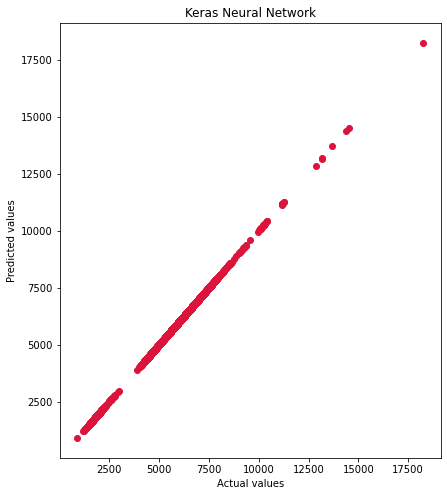

In [14]:
y_pred = y_pred.reshape(7136)
graph_plot(y_test, y_pred)

In [15]:
# model with single hidden layer and 4 hidden nodes
msle = MeanSquaredLogarithmicError()
model_1_4 = Sequential()
# input layer
model_1_4.add(Dense(units=4, kernel_initializer='normal', activation='relu', input_dim=59))
# hidden layer 1
model_1_4.add(Dense(units=4, kernel_initializer='normal', activation='relu'))
# output layer
model_1_4.add(Dense(units=1, kernel_initializer='normal', activation='linear'))

model_1_4.compile(optimizer=Adam(learning_rate = 0.01), loss=msle, metrics=[msle])

# train model
model_1_4.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
209/209 [==============================] - 1s 2ms/step - loss: 73.8710 - mean_squared_logarithmic_error: 73.8628 - val_loss: 73.7553 - val_mean_squared_logarithmic_error: 73.7406
Epoch 2/10
209/209 [==============================] - 0s 1ms/step - loss: 73.8711 - mean_squared_logarithmic_error: 73.8670 - val_loss: 73.7553 - val_mean_squared_logarithmic_error: 73.7406
Epoch 3/10
209/209 [==============================] - 0s 2ms/step - loss: 73.8711 - mean_squared_logarithmic_error: 73.8706 - val_loss: 73.7553 - val_mean_squared_logarithmic_error: 73.7406
Epoch 4/10
209/209 [==============================] - 0s 2ms/step - loss: 73.8711 - mean_squared_logarithmic_error: 73.8568 - val_loss: 73.7553 - val_mean_squared_logarithmic_error: 73.7406
Epoch 5/10
209/209 [==============================] - 0s 2ms/step - loss: 73.8710 - mean_squared_logarithmic_error: 73.8543 - val_loss: 73.7553 - val_mean_squared_logarithmic_error: 73.7406
Epoch 6/10
209/209 [==============================

In [16]:
y_pred = model_1_4.predict(x_test)

223/223 [==============================] - 0s 1ms/step


In [17]:
y_pred = y_pred.reshape(7136)

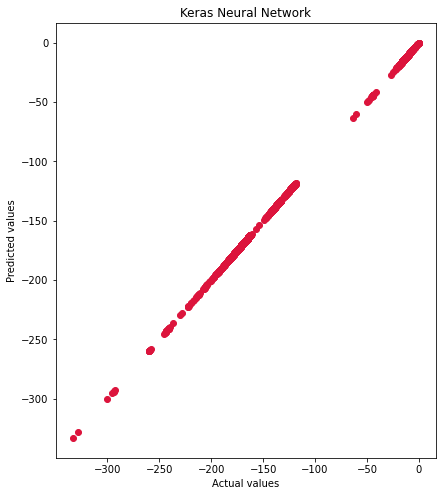

In [18]:
graph_plot(y_test,y_pred)

In [19]:
# model with single hidden layer and 8 hidden nodes
msle = MeanSquaredLogarithmicError()
model_1_8 = Sequential()
# input layer
model_1_8.add(Dense(units=8, kernel_initializer='normal', activation='relu', input_dim=59))
# hidden layer 1
model_1_8.add(Dense(units=8, kernel_initializer='normal', activation='relu'))
# output layer
model_1_8.add(Dense(units=1, kernel_initializer='normal', activation='linear'))

model_1_8.compile(optimizer=Adam(learning_rate = 0.01), loss=msle, metrics=[msle])

# train model
model_1_8.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
209/209 [==============================] - 1s 2ms/step - loss: 0.1720 - mean_squared_logarithmic_error: 0.1713 - val_loss: 0.0202 - val_mean_squared_logarithmic_error: 0.0199
Epoch 2/10
209/209 [==============================] - 0s 1ms/step - loss: 0.0131 - mean_squared_logarithmic_error: 0.0131 - val_loss: 0.0062 - val_mean_squared_logarithmic_error: 0.0061
Epoch 3/10
209/209 [==============================] - 0s 2ms/step - loss: 0.0041 - mean_squared_logarithmic_error: 0.0040 - val_loss: 0.0034 - val_mean_squared_logarithmic_error: 0.0034
Epoch 4/10
209/209 [==============================] - 0s 2ms/step - loss: 0.0027 - mean_squared_logarithmic_error: 0.0027 - val_loss: 0.0022 - val_mean_squared_logarithmic_error: 0.0022
Epoch 5/10
209/209 [==============================] - 0s 2ms/step - loss: 0.0021 - mean_squared_logarithmic_error: 0.0021 - val_loss: 0.0037 - val_mean_squared_logarithmic_error: 0.0037
Epoch 6/10
209/209 [==============================] - 0s 2ms/step - lo

In [20]:
y_pred = model_1_8.predict(x_test)

223/223 [==============================] - 0s 944us/step


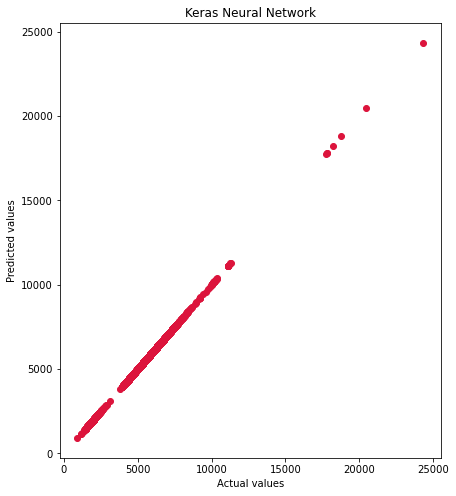

In [21]:
y_pred = y_pred.reshape(7136)
graph_plot(y_test, y_pred)

In [22]:
# model with single hidden layer and 12 hidden nodes
msle = MeanSquaredLogarithmicError()
model_1_12 = Sequential()
# input layer
model_1_12.add(Dense(units=12, kernel_initializer='normal', activation='relu', input_dim=59))
# hidden layer 1
model_1_12.add(Dense(units=12, kernel_initializer='normal', activation='relu'))
# output layer
model_1_12.add(Dense(units=1, kernel_initializer='normal', activation='linear'))

model_1_12.compile(optimizer=Adam(learning_rate = 0.01), loss=msle, metrics=[msle])

# train model
model_1_12.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
209/209 [==============================] - 1s 3ms/step - loss: 73.8711 - mean_squared_logarithmic_error: 73.8783 - val_loss: 73.7553 - val_mean_squared_logarithmic_error: 73.7406
Epoch 2/10
209/209 [==============================] - 0s 2ms/step - loss: 73.8710 - mean_squared_logarithmic_error: 73.8775 - val_loss: 73.7553 - val_mean_squared_logarithmic_error: 73.7406
Epoch 3/10
209/209 [==============================] - 0s 2ms/step - loss: 73.8710 - mean_squared_logarithmic_error: 73.8802 - val_loss: 73.7553 - val_mean_squared_logarithmic_error: 73.7406
Epoch 4/10
209/209 [==============================] - 0s 1ms/step - loss: 73.8711 - mean_squared_logarithmic_error: 73.8777 - val_loss: 73.7553 - val_mean_squared_logarithmic_error: 73.7406
Epoch 5/10
209/209 [==============================] - 0s 1ms/step - loss: 73.8711 - mean_squared_logarithmic_error: 73.8766 - val_loss: 73.7553 - val_mean_squared_logarithmic_error: 73.7406
Epoch 6/10
209/209 [==============================

In [23]:
y_pred = model_1_12.predict(x_test)

223/223 [==============================] - 0s 784us/step


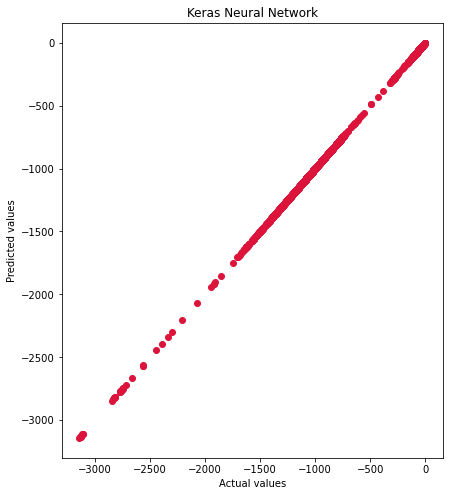

In [24]:
y_pred = y_pred.reshape(7136)
graph_plot(y_test, y_pred)

In [25]:
# model with single hidden layer and 16 hidden nodes
msle = MeanSquaredLogarithmicError()
model_1_16 = Sequential()
# input layer
model_1_16.add(Dense(units=12, kernel_initializer='normal', activation='relu', input_dim=59))
# hidden layer 1
model_1_16.add(Dense(units=12, kernel_initializer='normal', activation='relu'))
# output layer
model_1_16.add(Dense(units=1, kernel_initializer='normal', activation='linear'))

model_1_16.compile(optimizer=Adam(learning_rate = 0.01), loss=msle, metrics=[msle])

# train model
model_1_16.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
209/209 [==============================] - 1s 2ms/step - loss: 0.1281 - mean_squared_logarithmic_error: 0.1276 - val_loss: 0.0133 - val_mean_squared_logarithmic_error: 0.0131
Epoch 2/10
209/209 [==============================] - 0s 2ms/step - loss: 0.0076 - mean_squared_logarithmic_error: 0.0075 - val_loss: 0.0039 - val_mean_squared_logarithmic_error: 0.0038
Epoch 3/10
209/209 [==============================] - 1s 3ms/step - loss: 0.0028 - mean_squared_logarithmic_error: 0.0028 - val_loss: 0.0023 - val_mean_squared_logarithmic_error: 0.0022
Epoch 4/10
209/209 [==============================] - 0s 2ms/step - loss: 0.0020 - mean_squared_logarithmic_error: 0.0020 - val_loss: 0.0020 - val_mean_squared_logarithmic_error: 0.0020
Epoch 5/10
209/209 [==============================] - 0s 2ms/step - loss: 0.0023 - mean_squared_logarithmic_error: 0.0023 - val_loss: 0.0019 - val_mean_squared_logarithmic_error: 0.0019
Epoch 6/10
209/209 [==============================] - 0s 2ms/step - lo

In [26]:
y_pred = model_1_16.predict(x_test)

223/223 [==============================] - 0s 719us/step


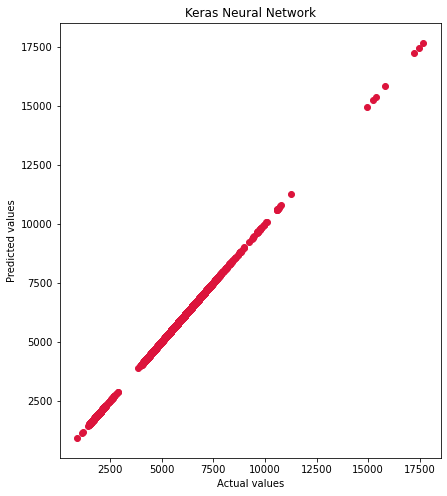

In [27]:
y_pred = y_pred.reshape(7136)
graph_plot(y_test,y_pred)

## Resons :

- learning rate : 
 - A traditional default value for the learning rate is 0.1 or 0.01.
 - If the learning rate is very high than may be chance of overshooting, and if learning rate is too low then the model works slow.

- activation :
   In input and hidden layer I choose ReLU function,
 - I choose relu activation function because it is fast.
 - More computationally efficient to compute than Sigmoid like functions since Relu just needs to pick max(0,𝑥) and      not perform expensive exponential operations as in Sigmoids
   In output layer I choose Linear function,
 - Because  for given dataset we have to predict number of shares so for that i want final result as positive number      from 0 to infinite which is not under any classification catagory.
 
- loss function :
   I select  Mean squared logarithmic error function for loss,
 - Use MSLE when doing regression, believing that your target, conditioned on the input, is normally distributed, and    you don’t want large errors to be significantly more penalized than small ones, in those cases where the range of      the target value is large.
 - as describe above here we are going to pridict number of shares that is very crucial data that's why i choose MSLE    function

### 3)  Visually observe the dataset and design an appropriate feature transformation (derived feature) such that after feature transformation, the dataset can be classified using a minimal network architecture (minimum number of parameters). Design, train this minimal network, and report training and validation errors, and trained the parameters of the network. Use 70% training and 30%validation data, appropriate learning rate, activation and loss functions. Explain the final results.

In [41]:
data = pd.read_csv('/Users/parthkalathia/Desktop/Minor/train.csv')

In [42]:
data.head(10)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,427.0,13.0,116.0,0.782609,1.0,0.925373,6.0,4.0,0.0,0.0,...,0.136364,0.8,-0.125000,-0.125000,-0.125000,0.375000,-0.125000,0.125000,0.125000,6077.0
1,178.0,6.0,232.0,0.620690,1.0,0.804687,8.0,6.0,1.0,0.0,...,0.136364,0.6,-0.166667,-0.200000,-0.100000,0.000000,0.000000,0.500000,0.000000,6186.0
2,604.0,9.0,219.0,0.648402,1.0,0.818966,4.0,1.0,0.0,1.0,...,0.100000,1.0,-0.269811,-0.666667,-0.071429,0.125000,0.000000,0.375000,0.000000,4987.0
3,452.0,14.0,126.0,0.698413,1.0,0.849315,5.0,4.0,0.0,1.0,...,0.136364,0.3,-0.400000,-0.500000,-0.300000,0.400000,0.100000,0.100000,0.100000,6470.0
4,357.0,12.0,383.0,0.518617,1.0,0.671296,9.0,4.0,1.0,0.0,...,0.214286,0.5,-0.180903,-0.400000,-0.100000,0.450000,0.350000,0.050000,0.350000,5865.0
5,501.0,10.0,197.0,0.726257,1.0,0.814159,3.0,3.0,1.0,17.0,...,0.166667,1.0,-0.489683,-1.000000,-0.071429,0.683333,-0.150000,0.183333,0.150000,6051.0
6,19.0,12.0,170.0,0.646707,1.0,0.769231,3.0,2.0,1.0,0.0,...,0.100000,0.5,-0.187500,-0.187500,-0.187500,0.000000,0.000000,0.500000,0.000000,6078.0
7,345.0,8.0,618.0,0.478120,1.0,0.774086,4.0,3.0,1.0,0.0,...,0.100000,1.0,-0.343333,-0.500000,-0.166667,0.833333,-0.500000,0.333333,0.500000,5359.0
8,125.0,14.0,420.0,0.576355,1.0,0.705660,1.0,1.0,3.0,1.0,...,0.062500,0.7,-0.143750,-0.187500,-0.050000,0.303030,0.090909,0.196970,0.090909,5690.0
9,696.0,10.0,328.0,0.573171,1.0,0.708920,8.0,4.0,1.0,0.0,...,0.100000,0.5,-0.216667,-0.500000,-0.050000,0.000000,0.000000,0.500000,0.000000,1930.0


In [43]:
data.columns

Index([' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_p

In [44]:
data.corr()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
timedelta,1.000000,-0.237175,-0.057134,-0.000431,-0.002482,0.000382,-0.002307,0.066487,-0.035176,0.001287,...,0.050869,0.104380,-0.002593,0.058989,-0.061029,-0.018275,0.030552,0.014294,-0.010278,-0.617016
n_tokens_title,-0.237175,1.000000,0.015615,-0.005916,-0.005484,-0.006016,-0.048707,-0.014440,-0.012776,0.054967,...,-0.029440,-0.026191,-0.016113,-0.027449,0.009131,0.075504,0.001334,-0.146954,0.036315,0.122691
n_tokens_content,-0.057134,0.015615,1.000000,0.002504,0.019650,0.006546,0.425024,0.313226,0.339034,0.108519,...,-0.258753,0.419722,-0.132583,-0.450057,0.223737,0.002916,0.024263,0.011967,0.015712,-0.013443
n_unique_tokens,-0.000431,-0.005916,0.002504,1.000000,0.999747,0.999911,-0.003333,0.009138,0.030144,-0.001238,...,0.003507,-0.014837,0.006393,0.012171,-0.002575,-0.005927,-0.002827,-0.011826,-0.005321,0.001069
n_non_stop_words,-0.002482,-0.005484,0.019650,0.999747,1.000000,0.999724,0.004412,0.014502,0.037351,-0.001464,...,-0.002708,-0.006265,0.004188,0.003706,0.002336,-0.006443,-0.002209,-0.011226,-0.005325,0.000585
n_non_stop_unique_tokens,0.000382,-0.006016,0.006546,0.999911,0.999724,1.000000,-0.003869,0.009872,0.026597,-0.001480,...,0.002868,-0.009520,0.003617,0.007763,-0.002168,-0.006726,-0.003249,-0.011312,-0.006121,-0.000216
num_hrefs,-0.002307,-0.048707,0.425024,-0.003333,0.004412,-0.003869,1.000000,0.417618,0.361147,0.109788,...,-0.080663,0.290608,-0.157927,-0.267306,0.053323,0.042241,0.034159,0.007688,0.054471,0.029115
num_self_hrefs,0.066487,-0.014440,0.313226,0.009138,0.014502,0.009872,0.417618,1.000000,0.243231,0.076901,...,-0.072856,0.186723,-0.056968,-0.124551,0.040719,-0.008562,0.031153,0.008280,-0.003363,-0.031318
num_imgs,-0.035176,-0.012776,0.339034,0.030144,0.037351,0.026597,0.361147,0.243231,1.000000,-0.071956,...,-0.023098,0.155239,-0.069613,-0.136528,0.045506,0.053745,0.040287,-0.018274,0.059381,0.042891
num_videos,0.001287,0.054967,0.108519,-0.001238,-0.001464,-0.001480,0.109788,0.076901,-0.071956,1.000000,...,-0.009322,0.124722,-0.112864,-0.137844,0.030067,0.061940,0.018418,-0.023602,0.059207,0.064031


In [45]:
# drop columns which is in week correlation with shares
data = data.drop(columns=[' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words', ' num_hrefs', ' num_self_hrefs', ' num_imgs',' num_videos',' average_token_length', ' num_keywords', ' data_channel_is_lifestyle', ' data_channel_is_entertainment', 
                          ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world', ' kw_max_min', ' kw_avg_min', ' kw_max_avg', ' weekday_is_monday',' weekday_is_tuesday',' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', 
                          ' weekday_is_saturday',' weekday_is_sunday', ' is_weekend'])

In [46]:
data.shape

(23786, 33)

In [47]:
x = data.iloc[::,0:-1:]

In [48]:
y = data.iloc[::,-1]

In [51]:
# perform test train splitting data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle=False)

In [52]:
print("size of x_train : " ,x_train.shape)
print("size of x_test : " ,x_test.shape)

size of x_train :  (16650, 32)
size of x_test :  (7136, 32)


In [53]:
x_train

,timedelta,n_non_stop_unique_tokens,kw_min_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,427.0,0.925373,4.0,2700.0,843300.0,309862.500000,965.470899,2551.102028,1400.0,4900.0,...,0.436147,0.136364,0.8,-0.125000,-0.125000,-0.125000,0.375000,-0.125000,0.125000,0.125000
1,178.0,0.804687,-1.0,4300.0,843300.0,329800.000000,1949.600000,2787.753879,1000.0,11200.0,...,0.338994,0.136364,0.6,-0.166667,-0.200000,-0.100000,0.000000,0.000000,0.500000,0.000000
2,604.0,0.818966,4.0,8400.0,690400.0,191183.333333,2932.050916,3365.371718,0.0,0.0,...,0.457792,0.100000,1.0,-0.269811,-0.666667,-0.071429,0.125000,0.000000,0.375000,0.000000
3,452.0,0.849315,4.0,0.0,843300.0,386777.777778,0.000000,3355.251379,6300.0,6300.0,...,0.218182,0.136364,0.3,-0.400000,-0.500000,-0.300000,0.400000,0.100000,0.100000,0.100000
4,357.0,0.671296,-1.0,2200.0,843300.0,267866.666667,995.000000,2193.888718,1000.0,1100.0,...,0.369898,0.214286,0.5,-0.180903,-0.400000,-0.100000,0.450000,0.350000,0.050000,0.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,499.0,0.485523,4.0,0.0,843300.0,148970.000000,0.000000,2262.300223,1500.0,10100.0,...,0.377518,0.050000,0.9,-0.195418,-0.700000,-0.071429,1.000000,0.000000,0.500000,0.000000
16646,456.0,0.693002,4.0,4900.0,843300.0,453360.000000,2264.000000,2937.950408,2100.0,2100.0,...,0.335981,0.033333,0.8,-0.327564,-0.600000,-0.100000,0.700000,-0.400000,0.200000,0.400000
16647,583.0,0.689567,4.0,0.0,690400.0,160133.333333,0.000000,2002.025603,729.0,2900.0,...,0.346601,0.033333,0.6,-0.244345,-0.400000,-0.075000,0.000000,0.000000,0.500000,0.000000
16648,191.0,0.793269,-1.0,0.0,843300.0,164175.000000,0.000000,2553.594472,0.0,0.0,...,0.298359,0.100000,0.7,-0.346190,-0.714286,-0.166667,0.833333,-0.388889,0.333333,0.388889


## Model Creation and Parameter Optimization

In [55]:
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from keras.losses import MeanSquaredLogarithmicError
from keras.models import Sequential
from keras.layers import Dense

In [62]:
def Po_classifier(optimizer='adam'):
    #adding our input layer
    classifier=Sequential()
    classifier.add(Dense(units=16,kernel_initializer='normal',activation='relu',input_dim=32))
    classifier.add(Dense(units=16,kernel_initializer='normal',activation='relu'))
    classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu'))
    classifier.add(Dense(units=1,activation='linear'))
    classifier.compile(optimizer='Adam',loss='MeanSquaredLogarithmicError',metrics=['accuracy'])
    return classifier

In [66]:
# grid search
classifier=KerasClassifier(build_fn=Po_classifier)
parameter={'batch_size':[10,20],'epochs':[100,200],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parameter,scoring='accuracy',cv=10)

/var/folders/rq/rl4qmvpx22jg0wx1l021ysr80000gn/T/ipykernel_3492/120053592.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier=KerasClassifier(build_fn=Po_classifier)


In [67]:
grid_search=grid_search.fit(x_train,y_train)

Epoch 1/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0474 - accuracy: 2.0020e-04
Epoch 2/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0244 - accuracy: 2.6693e-04
Epoch 3/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0236 - accuracy: 2.0020e-04
Epoch 4/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0234 - accuracy: 2.0020e-04
Epoch 5/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0229 - accuracy: 2.6693e-04
Epoch 6/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0213 - accuracy: 2.6693e-04
Epoch 7/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0224 - accuracy: 3.3367e-04
Epoch 8/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0189 - accuracy: 4.0040e-04
Epoch 9/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0164 - accuracy: 4.0040e-04
Epoch 10/100
1499/1499 [=============

1499/1499 [==============================] - 2s 1ms/step - loss: 0.0023 - accuracy: 2.6693e-04
Epoch 77/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0020 - accuracy: 4.0040e-04
Epoch 78/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0021 - accuracy: 4.0040e-04
Epoch 79/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0021 - accuracy: 4.0040e-04
Epoch 80/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0022 - accuracy: 4.0040e-04
Epoch 81/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0022 - accuracy: 4.0040e-04
Epoch 82/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0023 - accuracy: 4.0040e-04
Epoch 83/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0019 - accuracy: 4.0040e-04
Epoch 84/100
1499/1499 [==============================] - 4s 2ms/step - loss: 0.0019 - accuracy: 4.0040e-04
Epoch 85/100
1499/1499 [=================

1499/1499 [==============================] - 2s 2ms/step - loss: 0.0044 - accuracy: 2.0020e-04
Epoch 52/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0049 - accuracy: 2.0020e-04
Epoch 53/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0050 - accuracy: 2.0020e-04
Epoch 54/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0041 - accuracy: 2.0020e-04
Epoch 55/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0037 - accuracy: 2.0020e-04
Epoch 56/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0044 - accuracy: 2.0020e-04
Epoch 57/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0037 - accuracy: 2.0020e-04
Epoch 58/100
1499/1499 [==============================] - 4s 3ms/step - loss: 0.0046 - accuracy: 2.0020e-04
Epoch 59/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0034 - accuracy: 2.0020e-04
Epoch 60/100
1499/1499 [=================

1499/1499 [==============================] - 2s 1ms/step - loss: 0.0061 - accuracy: 4.0040e-04
Epoch 27/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0053 - accuracy: 4.0040e-04
Epoch 28/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0052 - accuracy: 3.3367e-04
Epoch 29/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0042 - accuracy: 4.0040e-04
Epoch 30/100
1499/1499 [==============================] - 4s 3ms/step - loss: 0.0047 - accuracy: 4.0040e-04
Epoch 31/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0041 - accuracy: 4.0040e-04
Epoch 32/100
1499/1499 [==============================] - 4s 3ms/step - loss: 0.0049 - accuracy: 4.0040e-04
Epoch 33/100
1499/1499 [==============================] - 5s 3ms/step - loss: 0.0034 - accuracy: 4.0040e-04
Epoch 34/100
1499/1499 [==============================] - 4s 2ms/step - loss: 0.0046 - accuracy: 4.0040e-04
Epoch 35/100
1499/1499 [=================

1499/1499 [==============================] - 3s 2ms/step - loss: 0.2299 - accuracy: 4.6713e-04
Epoch 2/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0246 - accuracy: 4.6713e-04
Epoch 3/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0232 - accuracy: 4.0040e-04
Epoch 4/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0231 - accuracy: 4.6713e-04
Epoch 5/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0234 - accuracy: 2.0020e-04
Epoch 6/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0226 - accuracy: 3.3367e-04
Epoch 7/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0223 - accuracy: 2.6693e-04
Epoch 8/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0211 - accuracy: 2.0020e-04
Epoch 9/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0202 - accuracy: 2.0020e-04
Epoch 10/100
1499/1499 [=========================

1499/1499 [==============================] - 3s 2ms/step - loss: 0.0059 - accuracy: 2.0020e-04
Epoch 78/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0053 - accuracy: 2.0020e-04
Epoch 79/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0035 - accuracy: 2.0020e-04
Epoch 80/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0026 - accuracy: 2.0020e-04
Epoch 81/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0024 - accuracy: 2.0020e-04
Epoch 82/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0023 - accuracy: 2.0020e-04
Epoch 83/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0024 - accuracy: 2.0020e-04
Epoch 84/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0022 - accuracy: 2.6693e-04
Epoch 85/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0022 - accuracy: 1.3347e-04
Epoch 86/100
1499/1499 [=================

1499/1499 [==============================] - 3s 2ms/step - loss: 0.0030 - accuracy: 4.6713e-04
Epoch 53/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0025 - accuracy: 4.6713e-04
Epoch 54/100
1499/1499 [==============================] - 5s 3ms/step - loss: 0.0028 - accuracy: 4.6713e-04
Epoch 55/100
1499/1499 [==============================] - 4s 3ms/step - loss: 0.0025 - accuracy: 4.6713e-04
Epoch 56/100
1499/1499 [==============================] - 4s 3ms/step - loss: 0.0024 - accuracy: 4.6713e-04
Epoch 57/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0026 - accuracy: 4.6713e-04
Epoch 58/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0025 - accuracy: 4.6713e-04
Epoch 59/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0027 - accuracy: 4.6713e-04
Epoch 60/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0024 - accuracy: 4.6713e-04
Epoch 61/100
1499/1499 [=================

1499/1499 [==============================] - 2s 1ms/step - loss: 0.0066 - accuracy: 3.3367e-04
Epoch 28/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0063 - accuracy: 2.6693e-04
Epoch 29/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0062 - accuracy: 1.3347e-04
Epoch 30/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0062 - accuracy: 2.0020e-04
Epoch 31/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0063 - accuracy: 4.0040e-04
Epoch 32/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0063 - accuracy: 2.6693e-04
Epoch 33/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0061 - accuracy: 2.6693e-04
Epoch 34/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0065 - accuracy: 2.0020e-04
Epoch 35/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0060 - accuracy: 4.0040e-04
Epoch 36/100
1499/1499 [=================

1499/1499 [==============================] - 3s 2ms/step - loss: 0.0239 - accuracy: 1.3347e-04
Epoch 3/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0227 - accuracy: 1.3347e-04
Epoch 4/100
1499/1499 [==============================] - 4s 2ms/step - loss: 0.0226 - accuracy: 1.3347e-04
Epoch 5/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0219 - accuracy: 6.6733e-05
Epoch 6/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0215 - accuracy: 6.6733e-05
Epoch 7/100
1499/1499 [==============================] - 4s 3ms/step - loss: 0.0214 - accuracy: 1.3347e-04
Epoch 8/100
1499/1499 [==============================] - 4s 2ms/step - loss: 0.0212 - accuracy: 1.3347e-04
Epoch 9/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0210 - accuracy: 1.3347e-04
Epoch 10/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0205 - accuracy: 1.3347e-04
Epoch 11/100
1499/1499 [========================

1499/1499 [==============================] - 2s 1ms/step - loss: 0.0061 - accuracy: 2.6693e-04
Epoch 79/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0061 - accuracy: 2.6693e-04
Epoch 80/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0059 - accuracy: 6.6733e-05
Epoch 81/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0063 - accuracy: 2.0020e-04
Epoch 82/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0058 - accuracy: 1.3347e-04
Epoch 83/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0059 - accuracy: 1.3347e-04
Epoch 84/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0058 - accuracy: 1.3347e-04
Epoch 85/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0059 - accuracy: 1.3347e-04
Epoch 86/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0055 - accuracy: 1.3347e-04
Epoch 87/100
1499/1499 [=================

1499/1499 [==============================] - 4s 3ms/step - loss: 0.0023 - accuracy: 1.3347e-04
Epoch 54/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0026 - accuracy: 1.3347e-04
Epoch 55/100
1499/1499 [==============================] - 4s 2ms/step - loss: 0.0023 - accuracy: 1.3347e-04
Epoch 56/100
1499/1499 [==============================] - 4s 3ms/step - loss: 0.0025 - accuracy: 1.3347e-04
Epoch 57/100
1499/1499 [==============================] - 4s 3ms/step - loss: 0.0029 - accuracy: 1.3347e-04
Epoch 58/100
1499/1499 [==============================] - 4s 3ms/step - loss: 0.0025 - accuracy: 1.3347e-04
Epoch 59/100
1499/1499 [==============================] - 4s 3ms/step - loss: 0.0021 - accuracy: 1.3347e-04
Epoch 60/100
1499/1499 [==============================] - 4s 3ms/step - loss: 0.0023 - accuracy: 1.3347e-04
Epoch 61/100
1499/1499 [==============================] - 4s 2ms/step - loss: 0.0022 - accuracy: 1.3347e-04
Epoch 62/100
1499/1499 [=================

1499/1499 [==============================] - 2s 2ms/step - loss: 0.0064 - accuracy: 2.6693e-04
Epoch 29/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0062 - accuracy: 2.0020e-04
Epoch 30/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0061 - accuracy: 4.0040e-04
Epoch 31/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0062 - accuracy: 2.6693e-04
Epoch 32/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0061 - accuracy: 2.6693e-04
Epoch 33/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0061 - accuracy: 4.0040e-04
Epoch 34/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0062 - accuracy: 1.3347e-04
Epoch 35/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0060 - accuracy: 3.3367e-04
Epoch 36/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0062 - accuracy: 3.3367e-04
Epoch 37/100
1499/1499 [=================

1499/1499 [==============================] - 2s 2ms/step - loss: 0.0228 - accuracy: 3.3367e-04
Epoch 4/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0221 - accuracy: 2.0020e-04
Epoch 5/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0211 - accuracy: 2.6693e-04
Epoch 6/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0205 - accuracy: 1.3347e-04
Epoch 7/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0195 - accuracy: 2.0020e-04
Epoch 8/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0196 - accuracy: 4.6713e-04
Epoch 9/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0189 - accuracy: 2.6693e-04
Epoch 10/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0185 - accuracy: 1.3347e-04
Epoch 11/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0185 - accuracy: 1.3347e-04
Epoch 12/100
1499/1499 [=======================

1499/1499 [==============================] - 4s 3ms/step - loss: 0.0030 - accuracy: 2.6693e-04
Epoch 80/100
1499/1499 [==============================] - 4s 2ms/step - loss: 0.0024 - accuracy: 1.3347e-04
Epoch 81/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0036 - accuracy: 2.0020e-04
Epoch 82/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0024 - accuracy: 2.6693e-04
Epoch 83/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0025 - accuracy: 2.6693e-04
Epoch 84/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0032 - accuracy: 2.0020e-04
Epoch 85/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0089 - accuracy: 1.3347e-04
Epoch 86/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0072 - accuracy: 2.0020e-04
Epoch 87/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0068 - accuracy: 2.0020e-04
Epoch 88/100
1499/1499 [=================

1499/1499 [==============================] - 2s 2ms/step - loss: 0.0061 - accuracy: 4.0040e-04
Epoch 55/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0063 - accuracy: 4.0040e-04
Epoch 56/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0064 - accuracy: 4.0040e-04
Epoch 57/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0062 - accuracy: 4.0040e-04
Epoch 58/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0061 - accuracy: 4.0040e-04
Epoch 59/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0062 - accuracy: 4.0040e-04
Epoch 60/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0063 - accuracy: 4.0040e-04
Epoch 61/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0062 - accuracy: 4.0040e-04
Epoch 62/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0061 - accuracy: 4.0040e-04
Epoch 63/100
1499/1499 [=================

1499/1499 [==============================] - 2s 2ms/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 30/100
1499/1499 [==============================] - 2s 2ms/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 31/100
1499/1499 [==============================] - 4s 2ms/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 32/100
1499/1499 [==============================] - 3s 2ms/step - loss: 54.6556 - accuracy: 4.6713e-04
Epoch 33/100
1499/1499 [==============================] - 3s 2ms/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 34/100
1499/1499 [==============================] - 3s 2ms/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 35/100
1499/1499 [==============================] - 3s 2ms/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 36/100
1499/1499 [==============================] - 3s 2ms/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 37/100
1499/1499 [==============================] - 3s 2ms/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 38/100
1499/1499 [========

1499/1499 [==============================] - 2s 2ms/step - loss: 0.0243 - accuracy: 2.6693e-04
Epoch 4/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0238 - accuracy: 2.0020e-04
Epoch 5/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0231 - accuracy: 3.3367e-04
Epoch 6/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0217 - accuracy: 2.0020e-04
Epoch 7/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0205 - accuracy: 2.0020e-04
Epoch 8/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0199 - accuracy: 0.0000e+00
Epoch 9/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0189 - accuracy: 4.0040e-04
Epoch 10/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0184 - accuracy: 2.6693e-04
Epoch 11/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0184 - accuracy: 3.3367e-04
Epoch 12/100
1499/1499 [=======================

1499/1499 [==============================] - 4s 3ms/step - loss: 0.0028 - accuracy: 6.6733e-05
Epoch 80/100
1499/1499 [==============================] - 4s 3ms/step - loss: 0.0027 - accuracy: 2.0020e-04
Epoch 81/100
1499/1499 [==============================] - 4s 3ms/step - loss: 0.0138 - accuracy: 2.0020e-04
Epoch 82/100
1499/1499 [==============================] - 4s 2ms/step - loss: 0.0114 - accuracy: 2.0020e-04
Epoch 83/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0092 - accuracy: 2.0020e-04
Epoch 84/100
1499/1499 [==============================] - 4s 3ms/step - loss: 0.0080 - accuracy: 2.0020e-04
Epoch 85/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0078 - accuracy: 2.0020e-04
Epoch 86/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0076 - accuracy: 2.0020e-04
Epoch 87/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0069 - accuracy: 2.0020e-04
Epoch 88/100
1499/1499 [=================

1499/1499 [==============================] - 2s 1ms/step - loss: 54.6775 - accuracy: 4.6713e-04
Epoch 55/100
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6775 - accuracy: 4.6713e-04
Epoch 56/100
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6776 - accuracy: 4.6713e-04
Epoch 57/100
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6775 - accuracy: 4.6713e-04
Epoch 58/100
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6775 - accuracy: 4.6713e-04
Epoch 59/100
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6775 - accuracy: 4.6713e-04
Epoch 60/100
1499/1499 [==============================] - 2s 2ms/step - loss: 54.6775 - accuracy: 4.6713e-04
Epoch 61/100
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6776 - accuracy: 4.6713e-04
Epoch 62/100
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6775 - accuracy: 4.6713e-04
Epoch 63/100
1499/1499 [========

1499/1499 [==============================] - 2s 1ms/step - loss: 0.0041 - accuracy: 6.6733e-05
Epoch 30/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0029 - accuracy: 0.0000e+00
Epoch 31/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0048 - accuracy: 4.0040e-04
Epoch 32/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0062 - accuracy: 4.6713e-04
Epoch 33/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0038 - accuracy: 4.0040e-04
Epoch 34/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0032 - accuracy: 3.3367e-04
Epoch 35/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0041 - accuracy: 4.6713e-04
Epoch 36/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0032 - accuracy: 4.6713e-04
Epoch 37/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0029 - accuracy: 4.6713e-04
Epoch 38/100
1499/1499 [=================

1499/1499 [==============================] - 3s 2ms/step - loss: 0.0236 - accuracy: 5.3387e-04
Epoch 5/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0231 - accuracy: 4.6713e-04
Epoch 6/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0226 - accuracy: 4.6713e-04
Epoch 7/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0221 - accuracy: 3.3367e-04
Epoch 8/100
1499/1499 [==============================] - 4s 3ms/step - loss: 0.0208 - accuracy: 1.3347e-04
Epoch 9/100
1499/1499 [==============================] - 4s 3ms/step - loss: 0.0188 - accuracy: 3.3367e-04
Epoch 10/100
1499/1499 [==============================] - 4s 3ms/step - loss: 0.0179 - accuracy: 2.0020e-04
Epoch 11/100
1499/1499 [==============================] - 4s 3ms/step - loss: 0.0169 - accuracy: 2.0020e-04
Epoch 12/100
1499/1499 [==============================] - 4s 3ms/step - loss: 0.0165 - accuracy: 4.6713e-04
Epoch 13/100
1499/1499 [======================

1499/1499 [==============================] - 3s 2ms/step - loss: 0.0025 - accuracy: 4.6713e-04
Epoch 81/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0025 - accuracy: 4.6713e-04
Epoch 82/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0024 - accuracy: 4.6713e-04
Epoch 83/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0058 - accuracy: 3.3367e-04
Epoch 84/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0059 - accuracy: 3.3367e-04
Epoch 85/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0060 - accuracy: 1.3347e-04
Epoch 86/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0057 - accuracy: 2.0020e-04
Epoch 87/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0058 - accuracy: 3.3367e-04
Epoch 88/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0057 - accuracy: 4.0040e-04
Epoch 89/100
1499/1499 [=================

1499/1499 [==============================] - 3s 2ms/step - loss: 0.0062 - accuracy: 1.3347e-04
Epoch 56/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0061 - accuracy: 1.3347e-04
Epoch 57/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0059 - accuracy: 1.3347e-04
Epoch 58/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0061 - accuracy: 1.3347e-04
Epoch 59/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0060 - accuracy: 1.3347e-04
Epoch 60/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0058 - accuracy: 1.3347e-04
Epoch 61/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0058 - accuracy: 1.3347e-04
Epoch 62/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0059 - accuracy: 1.3347e-04
Epoch 63/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0058 - accuracy: 1.3347e-04
Epoch 64/100
1499/1499 [=================

1499/1499 [==============================] - 3s 2ms/step - loss: 54.7075 - accuracy: 3.3367e-04
Epoch 31/100
1499/1499 [==============================] - 3s 2ms/step - loss: 54.7075 - accuracy: 3.3367e-04
Epoch 32/100
1499/1499 [==============================] - 4s 3ms/step - loss: 54.7075 - accuracy: 3.3367e-04
Epoch 33/100
1499/1499 [==============================] - 5s 3ms/step - loss: 54.7075 - accuracy: 3.3367e-04
Epoch 34/100
1499/1499 [==============================] - 5s 3ms/step - loss: 54.7076 - accuracy: 3.3367e-04
Epoch 35/100
1499/1499 [==============================] - 4s 3ms/step - loss: 54.7075 - accuracy: 3.3367e-04
Epoch 36/100
1499/1499 [==============================] - 5s 4ms/step - loss: 54.7075 - accuracy: 3.3367e-04
Epoch 37/100
1499/1499 [==============================] - 4s 2ms/step - loss: 54.7075 - accuracy: 3.3367e-04
Epoch 38/100
1499/1499 [==============================] - 3s 2ms/step - loss: 54.7075 - accuracy: 3.3367e-04
Epoch 39/100
1499/1499 [========

1499/1499 [==============================] - 2s 1ms/step - loss: 0.0244 - accuracy: 3.3367e-04
Epoch 5/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0245 - accuracy: 2.0020e-04
Epoch 6/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0235 - accuracy: 3.3367e-04
Epoch 7/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0231 - accuracy: 1.3347e-04
Epoch 8/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0235 - accuracy: 3.3367e-04
Epoch 9/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0227 - accuracy: 4.6713e-04
Epoch 10/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0226 - accuracy: 4.0040e-04
Epoch 11/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0222 - accuracy: 4.6713e-04
Epoch 12/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0223 - accuracy: 4.0040e-04
Epoch 13/100
1499/1499 [======================

1499/1499 [==============================] - 6s 4ms/step - loss: 0.0020 - accuracy: 4.6713e-04
Epoch 81/100
1499/1499 [==============================] - 4s 2ms/step - loss: 0.0020 - accuracy: 4.0040e-04
Epoch 82/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0019 - accuracy: 4.6713e-04
Epoch 83/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0023 - accuracy: 4.6713e-04
Epoch 84/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0020 - accuracy: 4.0040e-04
Epoch 85/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0020 - accuracy: 4.6713e-04
Epoch 86/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0022 - accuracy: 4.6713e-04
Epoch 87/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0026 - accuracy: 4.0040e-04
Epoch 88/100
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0019 - accuracy: 4.6713e-04
Epoch 89/100
1499/1499 [=================

1499/1499 [==============================] - 3s 2ms/step - loss: 0.0057 - accuracy: 2.0020e-04
Epoch 56/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0058 - accuracy: 2.6693e-04
Epoch 57/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0057 - accuracy: 6.6733e-05
Epoch 58/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0057 - accuracy: 3.3367e-04
Epoch 59/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0058 - accuracy: 1.3347e-04
Epoch 60/100
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0057 - accuracy: 2.6693e-04
Epoch 61/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0058 - accuracy: 2.6693e-04
Epoch 62/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0057 - accuracy: 4.6713e-04
Epoch 63/100
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0055 - accuracy: 3.3367e-04
Epoch 64/100
1499/1499 [=================

1499/1499 [==============================] - 4s 2ms/step - loss: 0.0062 - accuracy: 3.3367e-04
Epoch 31/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0064 - accuracy: 2.6693e-04
Epoch 32/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0063 - accuracy: 2.0020e-04
Epoch 33/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0063 - accuracy: 1.3347e-04
Epoch 34/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0061 - accuracy: 1.3347e-04
Epoch 35/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0061 - accuracy: 2.0020e-04
Epoch 36/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0062 - accuracy: 6.6733e-05
Epoch 37/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0061 - accuracy: 1.3347e-04
Epoch 38/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0060 - accuracy: 2.0020e-04
Epoch 39/200
1499/1499 [=================

1499/1499 [==============================] - 2s 1ms/step - loss: 0.0056 - accuracy: 1.3347e-04
Epoch 106/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0056 - accuracy: 1.3347e-04
Epoch 107/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0056 - accuracy: 1.3347e-04
Epoch 108/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0055 - accuracy: 1.3347e-04
Epoch 109/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0056 - accuracy: 2.0020e-04
Epoch 110/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0056 - accuracy: 2.6693e-04
Epoch 111/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0057 - accuracy: 2.0020e-04
Epoch 112/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0056 - accuracy: 4.0040e-04
Epoch 113/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0056 - accuracy: 2.0020e-04
Epoch 114/200
1499/1499 [========

1499/1499 [==============================] - 2s 1ms/step - loss: 0.0016 - accuracy: 1.3347e-04
Epoch 181/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0017 - accuracy: 1.3347e-04
Epoch 182/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0016 - accuracy: 1.3347e-04
Epoch 183/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0020 - accuracy: 1.3347e-04
Epoch 184/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0017 - accuracy: 1.3347e-04
Epoch 185/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0017 - accuracy: 1.3347e-04
Epoch 186/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0016 - accuracy: 6.6733e-05
Epoch 187/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0018 - accuracy: 2.0020e-04
Epoch 188/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0019 - accuracy: 2.0020e-04
Epoch 189/200
1499/1499 [========

1499/1499 [==============================] - 1s 880us/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 55/200
1499/1499 [==============================] - 1s 891us/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 56/200
1499/1499 [==============================] - 1s 873us/step - loss: 54.6556 - accuracy: 4.6713e-04
Epoch 57/200
1499/1499 [==============================] - 2996s 2s/step - loss: 54.6556 - accuracy: 4.6713e-04
Epoch 58/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 59/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 60/200
1499/1499 [==============================] - 7208s 5s/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 61/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 62/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6556 - accuracy: 4.6713e-04
Epoch 63/200
1499/1499

1499/1499 [==============================] - 2s 1ms/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 129/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 130/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6556 - accuracy: 4.6713e-04
Epoch 131/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 132/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 133/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6556 - accuracy: 4.6713e-04
Epoch 134/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 135/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 136/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6556 - accuracy: 4.6713e-04
Epoch 137/200
1499/1499 

1499/1499 [==============================] - 2s 1ms/step - loss: 0.0244 - accuracy: 1.3347e-04
Epoch 3/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0244 - accuracy: 2.0020e-04
Epoch 4/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0241 - accuracy: 2.6693e-04
Epoch 5/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0234 - accuracy: 2.6693e-04
Epoch 6/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0228 - accuracy: 3.3367e-04
Epoch 7/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0223 - accuracy: 2.6693e-04
Epoch 8/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0216 - accuracy: 1.3347e-04
Epoch 9/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0214 - accuracy: 2.6693e-04
Epoch 10/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0211 - accuracy: 6.6733e-05
Epoch 11/200
1499/1499 [========================

1499/1499 [==============================] - 2s 1ms/step - loss: 0.0026 - accuracy: 2.0020e-04
Epoch 79/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0023 - accuracy: 2.0020e-04
Epoch 80/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0023 - accuracy: 2.0020e-04
Epoch 81/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0023 - accuracy: 2.0020e-04
Epoch 82/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0025 - accuracy: 2.0020e-04
Epoch 83/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0024 - accuracy: 2.0020e-04
Epoch 84/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0023 - accuracy: 2.0020e-04
Epoch 85/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0022 - accuracy: 2.0020e-04
Epoch 86/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0022 - accuracy: 2.0020e-04
Epoch 87/200
1499/1499 [=================

1499/1499 [==============================] - 2s 1ms/step - loss: 0.0019 - accuracy: 2.0020e-04
Epoch 154/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0019 - accuracy: 2.0020e-04
Epoch 155/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0020 - accuracy: 2.0020e-04
Epoch 156/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0019 - accuracy: 2.0020e-04
Epoch 157/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0018 - accuracy: 2.0020e-04
Epoch 158/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0018 - accuracy: 2.0020e-04
Epoch 159/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0019 - accuracy: 2.0020e-04
Epoch 160/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0020 - accuracy: 2.0020e-04
Epoch 161/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0019 - accuracy: 2.0020e-04
Epoch 162/200
1499/1499 [========

1499/1499 [==============================] - 3s 2ms/step - loss: 0.0036 - accuracy: 4.0040e-04
Epoch 29/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0044 - accuracy: 3.3367e-04
Epoch 30/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0033 - accuracy: 4.6713e-04
Epoch 31/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0027 - accuracy: 3.3367e-04
Epoch 32/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0033 - accuracy: 2.6693e-04
Epoch 33/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0038 - accuracy: 4.0040e-04
Epoch 34/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0035 - accuracy: 2.6693e-04
Epoch 35/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0037 - accuracy: 2.0020e-04
Epoch 36/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0029 - accuracy: 2.0020e-04
Epoch 37/200
1499/1499 [=================

1499/1499 [==============================] - 2s 1ms/step - loss: 0.0019 - accuracy: 3.3367e-04
Epoch 104/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0020 - accuracy: 4.0040e-04
Epoch 105/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0021 - accuracy: 4.0040e-04
Epoch 106/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0019 - accuracy: 2.0020e-04
Epoch 107/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0019 - accuracy: 4.6713e-04
Epoch 108/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0018 - accuracy: 2.0020e-04
Epoch 109/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0019 - accuracy: 1.3347e-04
Epoch 110/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0021 - accuracy: 4.0040e-04
Epoch 111/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0019 - accuracy: 3.3367e-04
Epoch 112/200
1499/1499 [========

1499/1499 [==============================] - 2s 1ms/step - loss: 0.0018 - accuracy: 4.6713e-04
Epoch 179/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0019 - accuracy: 2.6693e-04
Epoch 180/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0018 - accuracy: 4.0040e-04
Epoch 181/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0020 - accuracy: 2.6693e-04
Epoch 182/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0018 - accuracy: 2.0020e-04
Epoch 183/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0018 - accuracy: 2.0020e-04
Epoch 184/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0016 - accuracy: 5.3387e-04
Epoch 185/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0016 - accuracy: 6.0060e-04
Epoch 186/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0018 - accuracy: 2.0020e-04
Epoch 187/200
1499/1499 [========

1499/1499 [==============================] - 2s 1ms/step - loss: 0.0025 - accuracy: 4.6713e-04
Epoch 54/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0024 - accuracy: 4.6713e-04
Epoch 55/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0021 - accuracy: 4.6713e-04
Epoch 56/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0027 - accuracy: 4.6713e-04
Epoch 57/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0023 - accuracy: 4.6713e-04
Epoch 58/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0024 - accuracy: 2.6693e-04
Epoch 59/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0020 - accuracy: 4.6713e-04
Epoch 60/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0021 - accuracy: 4.6713e-04
Epoch 61/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0024 - accuracy: 4.6713e-04
Epoch 62/200
1499/1499 [=================

1499/1499 [==============================] - 2s 1ms/step - loss: 0.0017 - accuracy: 4.6713e-04
Epoch 129/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0017 - accuracy: 4.6713e-04
Epoch 130/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0019 - accuracy: 4.6713e-04
Epoch 131/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0017 - accuracy: 4.6713e-04
Epoch 132/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0016 - accuracy: 4.6713e-04
Epoch 133/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0016 - accuracy: 4.0040e-04
Epoch 134/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0017 - accuracy: 4.0040e-04
Epoch 135/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0016 - accuracy: 4.6713e-04
Epoch 136/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0016 - accuracy: 4.6713e-04
Epoch 137/200
1499/1499 [========

1499/1499 [==============================] - 2s 1ms/step - loss: 0.0236 - accuracy: 4.0040e-04
Epoch 3/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0230 - accuracy: 2.0020e-04
Epoch 4/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0231 - accuracy: 3.3367e-04
Epoch 5/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0231 - accuracy: 2.6693e-04
Epoch 6/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0226 - accuracy: 4.6713e-04
Epoch 7/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0220 - accuracy: 4.6713e-04
Epoch 8/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0225 - accuracy: 4.6713e-04
Epoch 9/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0210 - accuracy: 2.0020e-04
Epoch 10/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0200 - accuracy: 2.6693e-04
Epoch 11/200
1499/1499 [========================

1499/1499 [==============================] - 3s 2ms/step - loss: 0.0059 - accuracy: 2.0020e-04
Epoch 79/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0060 - accuracy: 2.0020e-04
Epoch 80/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0057 - accuracy: 2.0020e-04
Epoch 81/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0059 - accuracy: 2.0020e-04
Epoch 82/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0057 - accuracy: 2.0020e-04
Epoch 83/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0057 - accuracy: 2.0020e-04
Epoch 84/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0058 - accuracy: 2.0020e-04
Epoch 85/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0057 - accuracy: 1.3347e-04
Epoch 86/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0058 - accuracy: 6.6733e-05
Epoch 87/200
1499/1499 [=================

1499/1499 [==============================] - 4s 2ms/step - loss: 0.0056 - accuracy: 2.0020e-04
Epoch 154/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0055 - accuracy: 2.0020e-04
Epoch 155/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0055 - accuracy: 2.0020e-04
Epoch 156/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0055 - accuracy: 2.0020e-04
Epoch 157/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0055 - accuracy: 2.0020e-04
Epoch 158/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0056 - accuracy: 2.0020e-04
Epoch 159/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0056 - accuracy: 1.3347e-04
Epoch 160/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0054 - accuracy: 2.0020e-04
Epoch 161/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0056 - accuracy: 2.0020e-04
Epoch 162/200
1499/1499 [========

1499/1499 [==============================] - 3s 2ms/step - loss: 0.0032 - accuracy: 1.3347e-04
Epoch 29/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0034 - accuracy: 1.3347e-04
Epoch 30/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0029 - accuracy: 6.6733e-05
Epoch 31/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0032 - accuracy: 2.6693e-04
Epoch 32/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0029 - accuracy: 1.3347e-04
Epoch 33/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0028 - accuracy: 1.3347e-04
Epoch 34/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0031 - accuracy: 3.3367e-04
Epoch 35/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0027 - accuracy: 3.3367e-04
Epoch 36/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0026 - accuracy: 2.6693e-04
Epoch 37/200
1499/1499 [=================

1499/1499 [==============================] - 3s 2ms/step - loss: 0.0018 - accuracy: 1.3347e-04
Epoch 104/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0017 - accuracy: 1.3347e-04
Epoch 105/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0017 - accuracy: 2.0020e-04
Epoch 106/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0018 - accuracy: 1.3347e-04
Epoch 107/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0019 - accuracy: 1.3347e-04
Epoch 108/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0017 - accuracy: 2.0020e-04
Epoch 109/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0016 - accuracy: 1.3347e-04
Epoch 110/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0017 - accuracy: 6.6733e-05
Epoch 111/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0017 - accuracy: 1.3347e-04
Epoch 112/200
1499/1499 [========

1499/1499 [==============================] - 3s 2ms/step - loss: 0.0015 - accuracy: 1.3347e-04
Epoch 179/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0015 - accuracy: 1.3347e-04
Epoch 180/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0014 - accuracy: 1.3347e-04
Epoch 181/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0015 - accuracy: 1.3347e-04
Epoch 182/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0016 - accuracy: 2.6693e-04
Epoch 183/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0014 - accuracy: 6.6733e-05
Epoch 184/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0016 - accuracy: 1.3347e-04
Epoch 185/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0014 - accuracy: 1.3347e-04
Epoch 186/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0015 - accuracy: 1.3347e-04
Epoch 187/200
1499/1499 [========

1499/1499 [==============================] - 3s 2ms/step - loss: 0.0022 - accuracy: 1.3347e-04
Epoch 54/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0024 - accuracy: 1.3347e-04
Epoch 55/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0022 - accuracy: 1.3347e-04
Epoch 56/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0026 - accuracy: 1.3347e-04
Epoch 57/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0022 - accuracy: 2.0020e-04
Epoch 58/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0022 - accuracy: 1.3347e-04
Epoch 59/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0020 - accuracy: 1.3347e-04
Epoch 60/200
1499/1499 [==============================] - 4s 3ms/step - loss: 0.0022 - accuracy: 1.3347e-04
Epoch 61/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0023 - accuracy: 1.3347e-04
Epoch 62/200
1499/1499 [=================

1499/1499 [==============================] - 4s 3ms/step - loss: 0.0018 - accuracy: 1.3347e-04
Epoch 129/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0016 - accuracy: 1.3347e-04
Epoch 130/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0016 - accuracy: 1.3347e-04
Epoch 131/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0018 - accuracy: 1.3347e-04
Epoch 132/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0016 - accuracy: 1.3347e-04
Epoch 133/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0016 - accuracy: 1.3347e-04
Epoch 134/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0017 - accuracy: 1.3347e-04
Epoch 135/200
1499/1499 [==============================] - 4s 3ms/step - loss: 0.0017 - accuracy: 1.3347e-04
Epoch 136/200
1499/1499 [==============================] - 4s 2ms/step - loss: 0.0017 - accuracy: 1.3347e-04
Epoch 137/200
1499/1499 [========

1499/1499 [==============================] - 4s 2ms/step - loss: 0.0240 - accuracy: 4.6713e-04
Epoch 3/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0235 - accuracy: 4.6713e-04
Epoch 4/200
1499/1499 [==============================] - 4s 2ms/step - loss: 0.0233 - accuracy: 4.6713e-04
Epoch 5/200
1499/1499 [==============================] - 4s 3ms/step - loss: 0.0233 - accuracy: 4.0040e-04
Epoch 6/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0227 - accuracy: 4.6713e-04
Epoch 7/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0225 - accuracy: 4.0040e-04
Epoch 8/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0222 - accuracy: 4.6713e-04
Epoch 9/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0217 - accuracy: 4.6713e-04
Epoch 10/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0210 - accuracy: 4.6713e-04
Epoch 11/200
1499/1499 [========================

1499/1499 [==============================] - 3s 2ms/step - loss: 0.0021 - accuracy: 4.6713e-04
Epoch 79/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0019 - accuracy: 4.6713e-04
Epoch 80/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0021 - accuracy: 4.6713e-04
Epoch 81/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0021 - accuracy: 4.6713e-04
Epoch 82/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0019 - accuracy: 4.6713e-04
Epoch 83/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0020 - accuracy: 4.6713e-04
Epoch 84/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0018 - accuracy: 4.6713e-04
Epoch 85/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0019 - accuracy: 4.6713e-04
Epoch 86/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0019 - accuracy: 4.6713e-04
Epoch 87/200
1499/1499 [=================

1499/1499 [==============================] - 3s 2ms/step - loss: 0.0016 - accuracy: 4.6713e-04
Epoch 154/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0016 - accuracy: 4.6713e-04
Epoch 155/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0016 - accuracy: 4.6713e-04
Epoch 156/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0015 - accuracy: 4.6713e-04
Epoch 157/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0015 - accuracy: 4.6713e-04
Epoch 158/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0017 - accuracy: 4.6713e-04
Epoch 159/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0016 - accuracy: 4.6713e-04
Epoch 160/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0015 - accuracy: 4.6713e-04
Epoch 161/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0016 - accuracy: 4.6713e-04
Epoch 162/200
1499/1499 [========

1499/1499 [==============================] - 3s 2ms/step - loss: 0.0071 - accuracy: 4.0040e-04
Epoch 29/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0069 - accuracy: 4.0040e-04
Epoch 30/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0069 - accuracy: 4.0040e-04
Epoch 31/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0067 - accuracy: 4.0040e-04
Epoch 32/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0068 - accuracy: 4.0040e-04
Epoch 33/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0066 - accuracy: 4.0040e-04
Epoch 34/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0069 - accuracy: 1.3347e-04
Epoch 35/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0067 - accuracy: 2.0020e-04
Epoch 36/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0065 - accuracy: 3.3367e-04
Epoch 37/200
1499/1499 [=================

1499/1499 [==============================] - 3s 2ms/step - loss: 0.0018 - accuracy: 3.3367e-04
Epoch 104/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0020 - accuracy: 4.0040e-04
Epoch 105/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0020 - accuracy: 4.0040e-04
Epoch 106/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0020 - accuracy: 4.0040e-04
Epoch 107/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0020 - accuracy: 1.3347e-04
Epoch 108/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0020 - accuracy: 2.0020e-04
Epoch 109/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0021 - accuracy: 3.3367e-04
Epoch 110/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0020 - accuracy: 3.3367e-04
Epoch 111/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0019 - accuracy: 2.0020e-04
Epoch 112/200
1499/1499 [========

1499/1499 [==============================] - 2s 1ms/step - loss: 0.0018 - accuracy: 4.0040e-04
Epoch 179/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0018 - accuracy: 4.0040e-04
Epoch 180/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0018 - accuracy: 4.0040e-04
Epoch 181/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0017 - accuracy: 4.0040e-04
Epoch 182/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0018 - accuracy: 2.6693e-04
Epoch 183/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0018 - accuracy: 4.0040e-04
Epoch 184/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0017 - accuracy: 4.0040e-04
Epoch 185/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0018 - accuracy: 2.6693e-04
Epoch 186/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0018 - accuracy: 4.0040e-04
Epoch 187/200
1499/1499 [========

1499/1499 [==============================] - 2s 2ms/step - loss: 0.0063 - accuracy: 1.3347e-04
Epoch 54/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0064 - accuracy: 1.3347e-04
Epoch 55/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0064 - accuracy: 1.3347e-04
Epoch 56/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0062 - accuracy: 1.3347e-04
Epoch 57/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0065 - accuracy: 6.6733e-05
Epoch 58/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0064 - accuracy: 1.3347e-04
Epoch 59/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0062 - accuracy: 1.3347e-04
Epoch 60/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0062 - accuracy: 1.3347e-04
Epoch 61/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0064 - accuracy: 1.3347e-04
Epoch 62/200
1499/1499 [=================

1499/1499 [==============================] - 2s 2ms/step - loss: 0.0020 - accuracy: 1.3347e-04
Epoch 129/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0019 - accuracy: 6.6733e-05
Epoch 130/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0038 - accuracy: 1.3347e-04
Epoch 131/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0063 - accuracy: 1.3347e-04
Epoch 132/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0063 - accuracy: 1.3347e-04
Epoch 133/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0068 - accuracy: 1.3347e-04
Epoch 134/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0062 - accuracy: 4.6713e-04
Epoch 135/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0062 - accuracy: 2.0020e-04
Epoch 136/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0064 - accuracy: 2.6693e-04
Epoch 137/200
1499/1499 [========

1499/1499 [==============================] - 2s 2ms/step - loss: 0.0238 - accuracy: 2.0020e-04
Epoch 3/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0236 - accuracy: 4.0040e-04
Epoch 4/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0230 - accuracy: 4.6713e-04
Epoch 5/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0224 - accuracy: 2.6693e-04
Epoch 6/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0216 - accuracy: 3.3367e-04
Epoch 7/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0212 - accuracy: 2.6693e-04
Epoch 8/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0209 - accuracy: 2.6693e-04
Epoch 9/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0209 - accuracy: 2.0020e-04
Epoch 10/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0203 - accuracy: 3.3367e-04
Epoch 11/200
1499/1499 [========================

1499/1499 [==============================] - 3s 2ms/step - loss: 0.0019 - accuracy: 1.3347e-04
Epoch 79/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0022 - accuracy: 3.3367e-04
Epoch 80/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0020 - accuracy: 1.3347e-04
Epoch 81/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0019 - accuracy: 2.6693e-04
Epoch 82/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0018 - accuracy: 2.0020e-04
Epoch 83/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0019 - accuracy: 2.0020e-04
Epoch 84/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0018 - accuracy: 5.3387e-04
Epoch 85/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0018 - accuracy: 2.0020e-04
Epoch 86/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0021 - accuracy: 4.0040e-04
Epoch 87/200
1499/1499 [=================

1499/1499 [==============================] - 3s 2ms/step - loss: 0.0016 - accuracy: 3.3367e-04
Epoch 154/200
1499/1499 [==============================] - 5s 3ms/step - loss: 0.0016 - accuracy: 4.0040e-04
Epoch 155/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0018 - accuracy: 2.6693e-04
Epoch 156/200
1499/1499 [==============================] - 4s 3ms/step - loss: 0.0016 - accuracy: 4.6713e-04
Epoch 157/200
1499/1499 [==============================] - 4s 2ms/step - loss: 0.0016 - accuracy: 2.6693e-04
Epoch 158/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0015 - accuracy: 2.6693e-04
Epoch 159/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0016 - accuracy: 4.0040e-04
Epoch 160/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0015 - accuracy: 4.0040e-04
Epoch 161/200
1499/1499 [==============================] - 5s 3ms/step - loss: 0.0016 - accuracy: 3.3367e-04
Epoch 162/200
1499/1499 [========

1499/1499 [==============================] - 2s 1ms/step - loss: 0.0160 - accuracy: 2.0020e-04
Epoch 29/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0156 - accuracy: 2.0020e-04
Epoch 30/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0143 - accuracy: 2.0020e-04
Epoch 31/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0119 - accuracy: 2.0020e-04
Epoch 32/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0109 - accuracy: 2.0020e-04
Epoch 33/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0078 - accuracy: 2.0020e-04
Epoch 34/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0069 - accuracy: 2.0020e-04
Epoch 35/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0061 - accuracy: 2.0020e-04
Epoch 36/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0057 - accuracy: 2.0020e-04
Epoch 37/200
1499/1499 [=================

1499/1499 [==============================] - 2s 1ms/step - loss: 0.0061 - accuracy: 2.0020e-04
Epoch 104/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0062 - accuracy: 2.0020e-04
Epoch 105/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0062 - accuracy: 2.0020e-04
Epoch 106/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0061 - accuracy: 2.0020e-04
Epoch 107/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0060 - accuracy: 2.0020e-04
Epoch 108/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0060 - accuracy: 2.0020e-04
Epoch 109/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0061 - accuracy: 2.0020e-04
Epoch 110/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0060 - accuracy: 2.0020e-04
Epoch 111/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0061 - accuracy: 2.0020e-04
Epoch 112/200
1499/1499 [========

1499/1499 [==============================] - 2s 1ms/step - loss: 0.0057 - accuracy: 2.0020e-04
Epoch 179/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0058 - accuracy: 2.0020e-04
Epoch 180/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0058 - accuracy: 2.0020e-04
Epoch 181/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0057 - accuracy: 2.0020e-04
Epoch 182/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0058 - accuracy: 2.0020e-04
Epoch 183/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0058 - accuracy: 2.0020e-04
Epoch 184/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0056 - accuracy: 2.0020e-04
Epoch 185/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0058 - accuracy: 2.0020e-04
Epoch 186/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0057 - accuracy: 2.0020e-04
Epoch 187/200
1499/1499 [========

1499/1499 [==============================] - 2s 1ms/step - loss: 54.6775 - accuracy: 4.6713e-04
Epoch 53/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6776 - accuracy: 4.6713e-04
Epoch 54/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6775 - accuracy: 4.6713e-04
Epoch 55/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6776 - accuracy: 4.6713e-04
Epoch 56/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6775 - accuracy: 4.6713e-04
Epoch 57/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6776 - accuracy: 4.6713e-04
Epoch 58/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6776 - accuracy: 4.6713e-04
Epoch 59/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6776 - accuracy: 4.6713e-04
Epoch 60/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6775 - accuracy: 4.6713e-04
Epoch 61/200
1499/1499 [========

1499/1499 [==============================] - 2s 1ms/step - loss: 54.6776 - accuracy: 4.6713e-04
Epoch 128/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6775 - accuracy: 4.6713e-04
Epoch 129/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6775 - accuracy: 4.6713e-04
Epoch 130/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6776 - accuracy: 4.6713e-04
Epoch 131/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6776 - accuracy: 4.6713e-04
Epoch 132/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6775 - accuracy: 4.6713e-04
Epoch 133/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6775 - accuracy: 4.6713e-04
Epoch 134/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6775 - accuracy: 4.6713e-04
Epoch 135/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6775 - accuracy: 4.6713e-04
Epoch 136/200
1499/1499 

1499/1499 [==============================] - 2s 1ms/step - loss: 0.0849 - accuracy: 3.3367e-04
Epoch 2/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0237 - accuracy: 4.0040e-04
Epoch 3/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0233 - accuracy: 4.0040e-04
Epoch 4/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0220 - accuracy: 3.3367e-04
Epoch 5/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0214 - accuracy: 2.6693e-04
Epoch 6/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0210 - accuracy: 3.3367e-04
Epoch 7/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0210 - accuracy: 4.0040e-04
Epoch 8/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0213 - accuracy: 2.0020e-04
Epoch 9/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0208 - accuracy: 3.3367e-04
Epoch 10/200
1499/1499 [=========================

1499/1499 [==============================] - 2s 1ms/step - loss: 0.0021 - accuracy: 4.6713e-04
Epoch 78/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0025 - accuracy: 4.0040e-04
Epoch 79/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0023 - accuracy: 5.3387e-04
Epoch 80/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0020 - accuracy: 4.6713e-04
Epoch 81/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0020 - accuracy: 4.6713e-04
Epoch 82/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0021 - accuracy: 4.6713e-04
Epoch 83/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0025 - accuracy: 4.0040e-04
Epoch 84/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0020 - accuracy: 4.6713e-04
Epoch 85/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0021 - accuracy: 4.6713e-04
Epoch 86/200
1499/1499 [=================

1499/1499 [==============================] - 2s 1ms/step - loss: 0.0018 - accuracy: 4.6713e-04
Epoch 153/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0018 - accuracy: 4.6713e-04
Epoch 154/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0016 - accuracy: 4.6713e-04
Epoch 155/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0017 - accuracy: 4.6713e-04
Epoch 156/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0019 - accuracy: 4.6713e-04
Epoch 157/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0017 - accuracy: 4.6713e-04
Epoch 158/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0018 - accuracy: 4.6713e-04
Epoch 159/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0018 - accuracy: 4.6713e-04
Epoch 160/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0017 - accuracy: 4.6713e-04
Epoch 161/200
1499/1499 [========

1499/1499 [==============================] - 2s 1ms/step - loss: 0.0057 - accuracy: 4.0040e-04
Epoch 28/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0038 - accuracy: 4.6713e-04
Epoch 29/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0065 - accuracy: 3.3367e-04
Epoch 30/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0034 - accuracy: 4.6713e-04
Epoch 31/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0040 - accuracy: 4.6713e-04
Epoch 32/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0035 - accuracy: 4.6713e-04
Epoch 33/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0039 - accuracy: 4.6713e-04
Epoch 34/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0040 - accuracy: 4.6713e-04
Epoch 35/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0040 - accuracy: 4.0040e-04
Epoch 36/200
1499/1499 [=================

1499/1499 [==============================] - 2s 2ms/step - loss: 0.0057 - accuracy: 4.6713e-04
Epoch 103/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0060 - accuracy: 4.6713e-04
Epoch 104/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0057 - accuracy: 4.6713e-04
Epoch 105/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0057 - accuracy: 4.6713e-04
Epoch 106/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0060 - accuracy: 4.6713e-04
Epoch 107/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0057 - accuracy: 3.3367e-04
Epoch 108/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0057 - accuracy: 4.6713e-04
Epoch 109/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0056 - accuracy: 4.6713e-04
Epoch 110/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0060 - accuracy: 4.0040e-04
Epoch 111/200
1499/1499 [========

1499/1499 [==============================] - 2s 1ms/step - loss: 0.0055 - accuracy: 4.6713e-04
Epoch 178/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0056 - accuracy: 5.3387e-04
Epoch 179/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0057 - accuracy: 4.6713e-04
Epoch 180/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0056 - accuracy: 4.6713e-04
Epoch 181/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0056 - accuracy: 4.6713e-04
Epoch 182/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0056 - accuracy: 4.6713e-04
Epoch 183/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0057 - accuracy: 4.6713e-04
Epoch 184/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0056 - accuracy: 4.6713e-04
Epoch 185/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0056 - accuracy: 4.6713e-04
Epoch 186/200
1499/1499 [========

1499/1499 [==============================] - 2s 2ms/step - loss: 54.7945 - accuracy: 3.3367e-04
Epoch 52/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.7946 - accuracy: 3.3367e-04
Epoch 53/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.7946 - accuracy: 3.3367e-04
Epoch 54/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.7946 - accuracy: 3.3367e-04
Epoch 55/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.7945 - accuracy: 3.3367e-04
Epoch 56/200
1499/1499 [==============================] - 2s 2ms/step - loss: 54.7946 - accuracy: 3.3367e-04
Epoch 57/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.7945 - accuracy: 3.3367e-04
Epoch 58/200
1499/1499 [==============================] - 3s 2ms/step - loss: 54.7946 - accuracy: 3.3367e-04
Epoch 59/200
1499/1499 [==============================] - 5s 3ms/step - loss: 54.7946 - accuracy: 3.3367e-04
Epoch 60/200
1499/1499 [========

1499/1499 [==============================] - 2s 1ms/step - loss: 54.7945 - accuracy: 3.3367e-04
Epoch 127/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.7946 - accuracy: 3.3367e-04
Epoch 128/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.7945 - accuracy: 3.3367e-04
Epoch 129/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.7945 - accuracy: 3.3367e-04
Epoch 130/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.7946 - accuracy: 3.3367e-04
Epoch 131/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.7945 - accuracy: 3.3367e-04
Epoch 132/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.7946 - accuracy: 3.3367e-04
Epoch 133/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.7945 - accuracy: 3.3367e-04
Epoch 134/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.7945 - accuracy: 3.3367e-04
Epoch 135/200
1499/1499 

53/53 [==============================] - 0s 914us/step
Epoch 1/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0279 - accuracy: 1.3347e-04
Epoch 2/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0234 - accuracy: 2.0020e-04
Epoch 3/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0226 - accuracy: 2.0020e-04
Epoch 4/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0224 - accuracy: 2.6693e-04
Epoch 5/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0208 - accuracy: 2.6693e-04
Epoch 6/200
1499/1499 [==============================] - 3s 2ms/step - loss: 0.0195 - accuracy: 6.6733e-05
Epoch 7/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0184 - accuracy: 2.0020e-04
Epoch 8/200
1499/1499 [==============================] - 2s 2ms/step - loss: 0.0179 - accuracy: 1.3347e-04
Epoch 9/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0166 - acc

1499/1499 [==============================] - 2s 1ms/step - loss: 0.0061 - accuracy: 1.3347e-04
Epoch 76/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0059 - accuracy: 1.3347e-04
Epoch 77/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0059 - accuracy: 1.3347e-04
Epoch 78/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0059 - accuracy: 1.3347e-04
Epoch 79/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0059 - accuracy: 1.3347e-04
Epoch 80/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0059 - accuracy: 1.3347e-04
Epoch 81/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0060 - accuracy: 1.3347e-04
Epoch 82/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0061 - accuracy: 1.3347e-04
Epoch 83/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0058 - accuracy: 1.3347e-04
Epoch 84/200
1499/1499 [=================

1499/1499 [==============================] - 2s 1ms/step - loss: 0.0056 - accuracy: 1.3347e-04
Epoch 151/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0056 - accuracy: 1.3347e-04
Epoch 152/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0056 - accuracy: 1.3347e-04
Epoch 153/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0056 - accuracy: 1.3347e-04
Epoch 154/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0056 - accuracy: 1.3347e-04
Epoch 155/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0056 - accuracy: 1.3347e-04
Epoch 156/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0056 - accuracy: 1.3347e-04
Epoch 157/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0056 - accuracy: 1.3347e-04
Epoch 158/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0055 - accuracy: 1.3347e-04
Epoch 159/200
1499/1499 [========

1499/1499 [==============================] - 2s 1ms/step - loss: 54.6564 - accuracy: 4.6713e-04
Epoch 25/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6564 - accuracy: 4.6713e-04
Epoch 26/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6564 - accuracy: 4.6713e-04
Epoch 27/200
1499/1499 [==============================] - 3s 2ms/step - loss: 54.6564 - accuracy: 4.6713e-04
Epoch 28/200
1499/1499 [==============================] - 3s 2ms/step - loss: 54.6564 - accuracy: 4.6713e-04
Epoch 29/200
1499/1499 [==============================] - 3s 2ms/step - loss: 54.6564 - accuracy: 4.6713e-04
Epoch 30/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6563 - accuracy: 4.6713e-04
Epoch 31/200
1499/1499 [==============================] - 2s 2ms/step - loss: 54.6564 - accuracy: 4.6713e-04
Epoch 32/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6564 - accuracy: 4.6713e-04
Epoch 33/200
1499/1499 [========

1499/1499 [==============================] - 2s 1ms/step - loss: 54.6564 - accuracy: 4.6713e-04
Epoch 100/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6564 - accuracy: 4.6713e-04
Epoch 101/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6564 - accuracy: 4.6713e-04
Epoch 102/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6564 - accuracy: 4.6713e-04
Epoch 103/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6564 - accuracy: 4.6713e-04
Epoch 104/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6563 - accuracy: 4.6713e-04
Epoch 105/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6564 - accuracy: 4.6713e-04
Epoch 106/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6564 - accuracy: 4.6713e-04
Epoch 107/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6564 - accuracy: 4.6713e-04
Epoch 108/200
1499/1499 

1499/1499 [==============================] - 2s 1ms/step - loss: 54.6564 - accuracy: 4.6713e-04
Epoch 174/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6564 - accuracy: 4.6713e-04
Epoch 175/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6564 - accuracy: 4.6713e-04
Epoch 176/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6564 - accuracy: 4.6713e-04
Epoch 177/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6563 - accuracy: 4.6713e-04
Epoch 178/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6564 - accuracy: 4.6713e-04
Epoch 179/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6564 - accuracy: 4.6713e-04
Epoch 180/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6564 - accuracy: 4.6713e-04
Epoch 181/200
1499/1499 [==============================] - 2s 1ms/step - loss: 54.6564 - accuracy: 4.6713e-04
Epoch 182/200
1499/1499 

1499/1499 [==============================] - 2s 1ms/step - loss: 0.0024 - accuracy: 4.0040e-04
Epoch 49/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0024 - accuracy: 4.0040e-04
Epoch 50/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0023 - accuracy: 4.0040e-04
Epoch 51/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0025 - accuracy: 4.0040e-04
Epoch 52/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0024 - accuracy: 4.0040e-04
Epoch 53/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0027 - accuracy: 3.3367e-04
Epoch 54/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0021 - accuracy: 4.0040e-04
Epoch 55/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0024 - accuracy: 4.0040e-04
Epoch 56/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0023 - accuracy: 4.0040e-04
Epoch 57/200
1499/1499 [=================

1499/1499 [==============================] - 2s 1ms/step - loss: 0.0017 - accuracy: 4.0040e-04
Epoch 124/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0017 - accuracy: 4.0040e-04
Epoch 125/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0018 - accuracy: 4.0040e-04
Epoch 126/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0018 - accuracy: 4.0040e-04
Epoch 127/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0018 - accuracy: 4.0040e-04
Epoch 128/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0019 - accuracy: 4.0040e-04
Epoch 129/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0017 - accuracy: 4.0040e-04
Epoch 130/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0019 - accuracy: 4.0040e-04
Epoch 131/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0018 - accuracy: 4.0040e-04
Epoch 132/200
1499/1499 [========

1499/1499 [==============================] - 2s 2ms/step - loss: 0.0015 - accuracy: 4.0040e-04
Epoch 199/200
1499/1499 [==============================] - 2s 1ms/step - loss: 0.0014 - accuracy: 4.0040e-04
Epoch 200/200
53/53 [==============================] - 0s 1ms/step
Epoch 1/100
750/750 [==============================] - 1s 1ms/step - loss: 0.1180 - accuracy: 6.6733e-05
Epoch 2/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0238 - accuracy: 1.3347e-04
Epoch 3/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0232 - accuracy: 2.6693e-04
Epoch 4/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0232 - accuracy: 2.0020e-04
Epoch 5/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0229 - accuracy: 2.0020e-04
Epoch 6/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0228 - accuracy: 4.0040e-04
Epoch 7/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0229 - accuracy: 1.334

750/750 [==============================] - 1s 1ms/step - loss: 0.0060 - accuracy: 1.3347e-04
Epoch 75/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0078 - accuracy: 1.3347e-04
Epoch 76/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0057 - accuracy: 1.3347e-04
Epoch 77/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0058 - accuracy: 1.3347e-04
Epoch 78/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0058 - accuracy: 1.3347e-04
Epoch 79/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0059 - accuracy: 1.3347e-04
Epoch 80/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0058 - accuracy: 1.3347e-04
Epoch 81/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0059 - accuracy: 1.3347e-04
Epoch 82/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0061 - accuracy: 1.3347e-04
Epoch 83/100
750/750 [==============================] - 1s 

Epoch 51/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0022 - accuracy: 2.6693e-04
Epoch 52/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0023 - accuracy: 4.0040e-04
Epoch 53/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0020 - accuracy: 3.3367e-04
Epoch 54/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0022 - accuracy: 4.0040e-04
Epoch 55/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0021 - accuracy: 2.0020e-04
Epoch 56/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0020 - accuracy: 3.3367e-04
Epoch 57/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0019 - accuracy: 2.0020e-04
Epoch 58/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0019 - accuracy: 3.3367e-04
Epoch 59/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0021 - accuracy: 4.0040e-04
Epoch 60/100
750/750 [========================

750/750 [==============================] - 1s 1ms/step - loss: 0.0064 - accuracy: 1.3347e-04
Epoch 28/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0062 - accuracy: 3.3367e-04
Epoch 29/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0066 - accuracy: 1.3347e-04
Epoch 30/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0063 - accuracy: 3.3367e-04
Epoch 31/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0063 - accuracy: 2.0020e-04
Epoch 32/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0062 - accuracy: 2.6693e-04
Epoch 33/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0064 - accuracy: 2.0020e-04
Epoch 34/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0060 - accuracy: 2.0020e-04
Epoch 35/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0070 - accuracy: 3.3367e-04
Epoch 36/100
750/750 [==============================] - 1s 

750/750 [==============================] - 1s 2ms/step - loss: 0.0227 - accuracy: 4.6713e-04
Epoch 4/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0231 - accuracy: 5.3387e-04
Epoch 5/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0224 - accuracy: 1.3347e-04
Epoch 6/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0216 - accuracy: 4.0040e-04
Epoch 7/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0215 - accuracy: 1.3347e-04
Epoch 8/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0211 - accuracy: 2.0020e-04
Epoch 9/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0232 - accuracy: 2.0020e-04
Epoch 10/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0207 - accuracy: 2.0020e-04
Epoch 11/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0202 - accuracy: 2.0020e-04
Epoch 12/100
750/750 [==============================] - 1s 2ms/st

750/750 [==============================] - 2s 2ms/step - loss: 0.0021 - accuracy: 2.6693e-04
Epoch 81/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0018 - accuracy: 2.0020e-04
Epoch 82/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0016 - accuracy: 3.3367e-04
Epoch 83/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0026 - accuracy: 1.3347e-04
Epoch 84/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0016 - accuracy: 3.3367e-04
Epoch 85/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0019 - accuracy: 2.0020e-04
Epoch 86/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0019 - accuracy: 2.0020e-04
Epoch 87/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0016 - accuracy: 2.0020e-04
Epoch 88/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0018 - accuracy: 2.0020e-04
Epoch 89/100
750/750 [==============================] - 2s 

750/750 [==============================] - 2s 2ms/step - loss: 0.0030 - accuracy: 4.6713e-04
Epoch 57/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0017 - accuracy: 4.0040e-04
Epoch 58/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0019 - accuracy: 2.0020e-04
Epoch 59/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0019 - accuracy: 5.3387e-04
Epoch 60/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0024 - accuracy: 3.3367e-04
Epoch 61/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0020 - accuracy: 3.3367e-04
Epoch 62/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0018 - accuracy: 4.6713e-04
Epoch 63/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0022 - accuracy: 6.6733e-05
Epoch 64/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0017 - accuracy: 4.0040e-04
Epoch 65/100
750/750 [==============================] - 2s 

Epoch 33/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0040 - accuracy: 2.6693e-04
Epoch 34/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0034 - accuracy: 4.0040e-04
Epoch 35/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0024 - accuracy: 3.3367e-04
Epoch 36/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0024 - accuracy: 4.6713e-04
Epoch 37/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0025 - accuracy: 3.3367e-04
Epoch 38/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0024 - accuracy: 2.6693e-04
Epoch 39/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0037 - accuracy: 3.3367e-04
Epoch 40/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0021 - accuracy: 1.3347e-04
Epoch 41/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 2.6693e-04
Epoch 42/100
750/750 [========================

750/750 [==============================] - 1s 1ms/step - loss: 0.0218 - accuracy: 2.6693e-04
Epoch 10/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0206 - accuracy: 1.3347e-04
Epoch 11/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0205 - accuracy: 2.0020e-04
Epoch 12/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0198 - accuracy: 6.6733e-05
Epoch 13/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0195 - accuracy: 2.0020e-04
Epoch 14/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0192 - accuracy: 1.3347e-04
Epoch 15/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0187 - accuracy: 2.0020e-04
Epoch 16/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0182 - accuracy: 1.3347e-04
Epoch 17/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0182 - accuracy: 6.6733e-05
Epoch 18/100
750/750 [==============================] - 1s 

750/750 [==============================] - 1s 1ms/step - loss: 0.0018 - accuracy: 1.3347e-04
Epoch 87/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0024 - accuracy: 1.3347e-04
Epoch 88/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0020 - accuracy: 1.3347e-04
Epoch 89/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0018 - accuracy: 1.3347e-04
Epoch 90/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0019 - accuracy: 1.3347e-04
Epoch 91/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0019 - accuracy: 1.3347e-04
Epoch 92/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0026 - accuracy: 1.3347e-04
Epoch 93/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0017 - accuracy: 1.3347e-04
Epoch 94/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0020 - accuracy: 1.3347e-04
Epoch 95/100
750/750 [==============================] - 1s 

Epoch 63/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0025 - accuracy: 1.3347e-04
Epoch 64/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0022 - accuracy: 1.3347e-04
Epoch 65/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0019 - accuracy: 6.6733e-05
Epoch 66/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0021 - accuracy: 1.3347e-04
Epoch 67/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0019 - accuracy: 2.6693e-04
Epoch 68/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0019 - accuracy: 1.3347e-04
Epoch 69/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0023 - accuracy: 1.3347e-04
Epoch 70/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0019 - accuracy: 1.3347e-04
Epoch 71/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0019 - accuracy: 1.3347e-04
Epoch 72/100
750/750 [========================

750/750 [==============================] - 1s 1ms/step - loss: 0.0062 - accuracy: 4.6713e-04
Epoch 40/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0060 - accuracy: 4.6713e-04
Epoch 41/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0057 - accuracy: 4.6713e-04
Epoch 42/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0060 - accuracy: 4.6713e-04
Epoch 43/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0055 - accuracy: 4.6713e-04
Epoch 44/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0047 - accuracy: 4.6713e-04
Epoch 45/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0038 - accuracy: 4.6713e-04
Epoch 46/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0029 - accuracy: 4.6713e-04
Epoch 47/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 4.6713e-04
Epoch 48/100
750/750 [==============================] - 1s 

750/750 [==============================] - 1s 1ms/step - loss: 54.8314 - accuracy: 4.0040e-04
Epoch 16/100
750/750 [==============================] - 1s 2ms/step - loss: 54.8313 - accuracy: 4.0040e-04
Epoch 17/100
750/750 [==============================] - 1s 2ms/step - loss: 54.8313 - accuracy: 4.0040e-04
Epoch 18/100
750/750 [==============================] - 1s 2ms/step - loss: 54.8314 - accuracy: 4.0040e-04
Epoch 19/100
750/750 [==============================] - 1s 2ms/step - loss: 54.8314 - accuracy: 4.0040e-04
Epoch 20/100
750/750 [==============================] - 1s 1ms/step - loss: 54.8314 - accuracy: 4.0040e-04
Epoch 21/100
750/750 [==============================] - 1s 2ms/step - loss: 54.8314 - accuracy: 4.0040e-04
Epoch 22/100
750/750 [==============================] - 1s 1ms/step - loss: 54.8314 - accuracy: 4.0040e-04
Epoch 23/100
750/750 [==============================] - 1s 2ms/step - loss: 54.8314 - accuracy: 4.0040e-04
Epoch 24/100
750/750 [============================

750/750 [==============================] - 1s 1ms/step - loss: 54.8314 - accuracy: 4.0040e-04
Epoch 92/100
750/750 [==============================] - 1s 1ms/step - loss: 54.8314 - accuracy: 4.0040e-04
Epoch 93/100
750/750 [==============================] - 1s 1ms/step - loss: 54.8313 - accuracy: 4.0040e-04
Epoch 94/100
750/750 [==============================] - 1s 2ms/step - loss: 54.8313 - accuracy: 4.0040e-04
Epoch 95/100
750/750 [==============================] - 1s 1ms/step - loss: 54.8313 - accuracy: 4.0040e-04
Epoch 96/100
750/750 [==============================] - 1s 1ms/step - loss: 54.8314 - accuracy: 4.0040e-04
Epoch 97/100
750/750 [==============================] - 1s 1ms/step - loss: 54.8314 - accuracy: 4.0040e-04
Epoch 98/100
750/750 [==============================] - 1s 1ms/step - loss: 54.8314 - accuracy: 4.0040e-04
Epoch 99/100
750/750 [==============================] - 1s 1ms/step - loss: 54.8314 - accuracy: 4.0040e-04
Epoch 100/100
53/53 [=============================

750/750 [==============================] - 1s 1ms/step - loss: 0.0019 - accuracy: 1.3347e-04
Epoch 68/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0019 - accuracy: 4.0040e-04
Epoch 69/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0021 - accuracy: 4.0040e-04
Epoch 70/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0023 - accuracy: 4.0040e-04
Epoch 71/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0017 - accuracy: 4.0040e-04
Epoch 72/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0019 - accuracy: 4.0040e-04
Epoch 73/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0020 - accuracy: 4.0040e-04
Epoch 74/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0021 - accuracy: 4.0040e-04
Epoch 75/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0021 - accuracy: 4.0040e-04
Epoch 76/100
750/750 [==============================] - 1s 

750/750 [==============================] - 2s 2ms/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 44/100
750/750 [==============================] - 2s 2ms/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 45/100
750/750 [==============================] - 2s 2ms/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 46/100
750/750 [==============================] - 2s 2ms/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 47/100
750/750 [==============================] - 2s 2ms/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 48/100
750/750 [==============================] - 2s 2ms/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 49/100
750/750 [==============================] - 1s 2ms/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 50/100
750/750 [==============================] - 1s 2ms/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 51/100
750/750 [==============================] - 2s 2ms/step - loss: 54.6556 - accuracy: 4.6713e-04
Epoch 52/100
750/750 [============================

750/750 [==============================] - 1s 2ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 20/100
750/750 [==============================] - 1s 2ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 21/100
750/750 [==============================] - 1s 2ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 22/100
750/750 [==============================] - 1s 1ms/step - loss: 54.6162 - accuracy: 4.0040e-04
Epoch 23/100
750/750 [==============================] - 1s 1ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 24/100
750/750 [==============================] - 1s 1ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 25/100
750/750 [==============================] - 1s 2ms/step - loss: 54.6162 - accuracy: 4.0040e-04
Epoch 26/100
750/750 [==============================] - 1s 2ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 27/100
750/750 [==============================] - 1s 2ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 28/100
750/750 [============================

750/750 [==============================] - 1s 2ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 96/100
750/750 [==============================] - 1s 1ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 97/100
750/750 [==============================] - 1s 2ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 98/100
750/750 [==============================] - 2s 2ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 99/100
750/750 [==============================] - 1s 2ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 100/100
53/53 [==============================] - 0s 1ms/step
Epoch 1/100
750/750 [==============================] - 2s 2ms/step - loss: 20.5913 - accuracy: 4.0040e-04
Epoch 2/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0237 - accuracy: 3.3367e-04
Epoch 3/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0231 - accuracy: 1.3347e-04
Epoch 4/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0226 - accuracy: 3

750/750 [==============================] - 1s 2ms/step - loss: 0.0022 - accuracy: 3.3367e-04
Epoch 72/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0023 - accuracy: 3.3367e-04
Epoch 73/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0023 - accuracy: 6.6733e-05
Epoch 74/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0021 - accuracy: 2.0020e-04
Epoch 75/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0022 - accuracy: 2.6693e-04
Epoch 76/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0020 - accuracy: 2.0020e-04
Epoch 77/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0020 - accuracy: 3.3367e-04
Epoch 78/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0019 - accuracy: 6.6733e-05
Epoch 79/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0032 - accuracy: 3.3367e-04
Epoch 80/100
750/750 [==============================] - 1s 

Epoch 48/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0021 - accuracy: 3.3367e-04
Epoch 49/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0024 - accuracy: 4.6713e-04
Epoch 50/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0021 - accuracy: 4.6713e-04
Epoch 51/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0020 - accuracy: 4.6713e-04
Epoch 52/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0020 - accuracy: 4.6713e-04
Epoch 53/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0021 - accuracy: 4.6713e-04
Epoch 54/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0019 - accuracy: 4.6713e-04
Epoch 55/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0021 - accuracy: 4.6713e-04
Epoch 56/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0018 - accuracy: 4.6713e-04
Epoch 57/100
750/750 [========================

750/750 [==============================] - 2s 2ms/step - loss: 0.0056 - accuracy: 3.3367e-04
Epoch 25/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0048 - accuracy: 2.6693e-04
Epoch 26/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0044 - accuracy: 4.0040e-04
Epoch 27/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0049 - accuracy: 2.6693e-04
Epoch 28/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0040 - accuracy: 4.6713e-04
Epoch 29/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0038 - accuracy: 2.0020e-04
Epoch 30/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0031 - accuracy: 2.0020e-04
Epoch 31/100
750/750 [==============================] - 3s 3ms/step - loss: 0.0031 - accuracy: 4.6713e-04
Epoch 32/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0032 - accuracy: 2.0020e-04
Epoch 33/100
750/750 [==============================] - 3s 

53/53 [==============================] - 0s 1ms/step
Epoch 1/100
750/750 [==============================] - 2s 2ms/step - loss: 1.7638 - accuracy: 2.6693e-04
Epoch 2/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0229 - accuracy: 3.3367e-04
Epoch 3/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0225 - accuracy: 3.3367e-04
Epoch 4/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0224 - accuracy: 3.3367e-04
Epoch 5/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0223 - accuracy: 3.3367e-04
Epoch 6/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0221 - accuracy: 6.6733e-05
Epoch 7/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0218 - accuracy: 1.3347e-04
Epoch 8/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0220 - accuracy: 1.3347e-04
Epoch 9/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0215 - accuracy: 1.3347e-04
Ep

750/750 [==============================] - 1s 2ms/step - loss: 0.0017 - accuracy: 1.3347e-04
Epoch 78/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0019 - accuracy: 2.6693e-04
Epoch 79/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0018 - accuracy: 1.3347e-04
Epoch 80/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0016 - accuracy: 1.3347e-04
Epoch 81/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0017 - accuracy: 1.3347e-04
Epoch 82/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0017 - accuracy: 1.3347e-04
Epoch 83/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0016 - accuracy: 1.3347e-04
Epoch 84/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0019 - accuracy: 1.3347e-04
Epoch 85/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0017 - accuracy: 1.3347e-04
Epoch 86/100
750/750 [==============================] - 1s 

Epoch 54/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0021 - accuracy: 1.3347e-04
Epoch 55/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0026 - accuracy: 1.3347e-04
Epoch 56/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0024 - accuracy: 1.3347e-04
Epoch 57/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0023 - accuracy: 1.3347e-04
Epoch 58/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0020 - accuracy: 1.3347e-04
Epoch 59/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 1.3347e-04
Epoch 60/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0020 - accuracy: 1.3347e-04
Epoch 61/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0023 - accuracy: 1.3347e-04
Epoch 62/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0022 - accuracy: 1.3347e-04
Epoch 63/100
750/750 [========================

750/750 [==============================] - 1s 1ms/step - loss: 0.0065 - accuracy: 4.0040e-04
Epoch 31/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0065 - accuracy: 2.0020e-04
Epoch 32/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0044 - accuracy: 4.0040e-04
Epoch 33/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0035 - accuracy: 4.6713e-04
Epoch 34/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0033 - accuracy: 4.0040e-04
Epoch 35/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0026 - accuracy: 2.6693e-04
Epoch 36/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0045 - accuracy: 4.0040e-04
Epoch 37/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0055 - accuracy: 4.0040e-04
Epoch 38/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0038 - accuracy: 4.6713e-04
Epoch 39/100
750/750 [==============================] - 1s 

Epoch 7/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0215 - accuracy: 1.3347e-04
Epoch 8/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0210 - accuracy: 1.3347e-04
Epoch 9/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0210 - accuracy: 2.6693e-04
Epoch 10/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0207 - accuracy: 3.3367e-04
Epoch 11/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0203 - accuracy: 2.0020e-04
Epoch 12/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0198 - accuracy: 4.0040e-04
Epoch 13/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0194 - accuracy: 2.6693e-04
Epoch 14/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0192 - accuracy: 1.3347e-04
Epoch 15/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0187 - accuracy: 2.6693e-04
Epoch 16/100
750/750 [===========================

750/750 [==============================] - 1s 1ms/step - loss: 0.0017 - accuracy: 4.0040e-04
Epoch 85/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0016 - accuracy: 4.0040e-04
Epoch 86/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0016 - accuracy: 4.0040e-04
Epoch 87/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0019 - accuracy: 4.0040e-04
Epoch 88/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0020 - accuracy: 4.0040e-04
Epoch 89/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0018 - accuracy: 4.0040e-04
Epoch 90/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0017 - accuracy: 4.0040e-04
Epoch 91/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0020 - accuracy: 4.0040e-04
Epoch 92/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0019 - accuracy: 4.0040e-04
Epoch 93/100
750/750 [==============================] - 1s 

750/750 [==============================] - 2s 2ms/step - loss: 0.0020 - accuracy: 6.6733e-05
Epoch 61/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0020 - accuracy: 1.3347e-04
Epoch 62/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0033 - accuracy: 1.3347e-04
Epoch 63/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0019 - accuracy: 2.0020e-04
Epoch 64/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0023 - accuracy: 2.6693e-04
Epoch 65/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.0000e+00
Epoch 66/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0020 - accuracy: 1.3347e-04
Epoch 67/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0023 - accuracy: 1.3347e-04
Epoch 68/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0018 - accuracy: 2.0020e-04
Epoch 69/200
750/750 [==============================] - 1s 

750/750 [==============================] - 2s 2ms/step - loss: 0.0056 - accuracy: 6.6733e-05
Epoch 138/200
750/750 [==============================] - 2s 2ms/step - loss: 0.0057 - accuracy: 2.0020e-04
Epoch 139/200
750/750 [==============================] - 2s 2ms/step - loss: 0.0055 - accuracy: 2.0020e-04
Epoch 140/200
750/750 [==============================] - 2s 2ms/step - loss: 0.0056 - accuracy: 1.3347e-04
Epoch 141/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0056 - accuracy: 1.3347e-04
Epoch 142/200
750/750 [==============================] - 2s 2ms/step - loss: 0.0058 - accuracy: 2.6693e-04
Epoch 143/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0026 - accuracy: 1.3347e-04
Epoch 144/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0019 - accuracy: 1.3347e-04
Epoch 145/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0016 - accuracy: 2.6693e-04
Epoch 146/200
750/750 [============================

750/750 [==============================] - 1s 1ms/step - loss: 0.0210 - accuracy: 3.3367e-04
Epoch 14/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0207 - accuracy: 2.0020e-04
Epoch 15/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0206 - accuracy: 4.6713e-04
Epoch 16/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0209 - accuracy: 2.0020e-04
Epoch 17/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0205 - accuracy: 1.3347e-04
Epoch 18/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0204 - accuracy: 4.0040e-04
Epoch 19/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0205 - accuracy: 2.6693e-04
Epoch 20/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0200 - accuracy: 4.0040e-04
Epoch 21/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0223 - accuracy: 2.0020e-04
Epoch 22/200
750/750 [==============================] - 1s 

750/750 [==============================] - 1s 2ms/step - loss: 0.0056 - accuracy: 2.0020e-04
Epoch 91/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0055 - accuracy: 2.6693e-04
Epoch 92/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0057 - accuracy: 2.0020e-04
Epoch 93/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0056 - accuracy: 2.0020e-04
Epoch 94/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0056 - accuracy: 2.0020e-04
Epoch 95/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0056 - accuracy: 2.0020e-04
Epoch 96/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0056 - accuracy: 2.0020e-04
Epoch 97/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0055 - accuracy: 2.0020e-04
Epoch 98/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0055 - accuracy: 2.0020e-04
Epoch 99/200
750/750 [==============================] - 1s 

750/750 [==============================] - 1s 1ms/step - loss: 0.0015 - accuracy: 2.0020e-04
Epoch 167/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0017 - accuracy: 2.0020e-04
Epoch 168/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0015 - accuracy: 2.0020e-04
Epoch 169/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0018 - accuracy: 1.3347e-04
Epoch 170/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0019 - accuracy: 2.0020e-04
Epoch 171/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0015 - accuracy: 2.0020e-04
Epoch 172/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0017 - accuracy: 2.0020e-04
Epoch 173/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0015 - accuracy: 2.0020e-04
Epoch 174/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0015 - accuracy: 2.0020e-04
Epoch 175/200
750/750 [============================

750/750 [==============================] - 1s 2ms/step - loss: 54.6162 - accuracy: 4.0040e-04
Epoch 43/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6162 - accuracy: 4.0040e-04
Epoch 44/200
750/750 [==============================] - 2s 2ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 45/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 46/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 47/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 48/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 49/200
750/750 [==============================] - 2s 2ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 50/200
750/750 [==============================] - 2s 3ms/step - loss: 54.6162 - accuracy: 4.0040e-04
Epoch 51/200
750/750 [============================

750/750 [==============================] - 1s 2ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 119/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6162 - accuracy: 4.0040e-04
Epoch 120/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 121/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 122/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 123/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 124/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 125/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6162 - accuracy: 4.0040e-04
Epoch 126/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 127/200
750/750 [===================

Epoch 194/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 195/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6162 - accuracy: 4.0040e-04
Epoch 196/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6162 - accuracy: 4.0040e-04
Epoch 197/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 198/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 199/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 200/200
53/53 [==============================] - 0s 776us/step
Epoch 1/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6775 - accuracy: 4.6713e-04
Epoch 2/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6775 - accuracy: 4.6713e-04
Epoch 3/200
750/750 [==============================] - 1s 2ms/step - lo

750/750 [==============================] - 1s 1ms/step - loss: 54.6776 - accuracy: 4.6713e-04
Epoch 71/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6775 - accuracy: 4.6713e-04
Epoch 72/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6775 - accuracy: 4.6713e-04
Epoch 73/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6775 - accuracy: 4.6713e-04
Epoch 74/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6775 - accuracy: 4.6713e-04
Epoch 75/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6775 - accuracy: 4.6713e-04
Epoch 76/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6776 - accuracy: 4.6713e-04
Epoch 77/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6775 - accuracy: 4.6713e-04
Epoch 78/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6775 - accuracy: 4.6713e-04
Epoch 79/200
750/750 [============================

750/750 [==============================] - 1s 1ms/step - loss: 54.6775 - accuracy: 4.6713e-04
Epoch 147/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6775 - accuracy: 4.6713e-04
Epoch 148/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6776 - accuracy: 4.6713e-04
Epoch 149/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6775 - accuracy: 4.6713e-04
Epoch 150/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6775 - accuracy: 4.6713e-04
Epoch 151/200
750/750 [==============================] - 2s 2ms/step - loss: 54.6775 - accuracy: 4.6713e-04
Epoch 152/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6775 - accuracy: 4.6713e-04
Epoch 153/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6775 - accuracy: 4.6713e-04
Epoch 154/200
750/750 [==============================] - 2s 2ms/step - loss: 54.6775 - accuracy: 4.6713e-04
Epoch 155/200
750/750 [===================

Epoch 22/200
750/750 [==============================] - 2s 2ms/step - loss: 0.0162 - accuracy: 2.0020e-04
Epoch 23/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0154 - accuracy: 4.6713e-04
Epoch 24/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0151 - accuracy: 4.6713e-04
Epoch 25/200
750/750 [==============================] - 2s 2ms/step - loss: 0.0151 - accuracy: 3.3367e-04
Epoch 26/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0141 - accuracy: 2.6693e-04
Epoch 27/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0128 - accuracy: 3.3367e-04
Epoch 28/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0112 - accuracy: 2.0020e-04
Epoch 29/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0091 - accuracy: 4.6713e-04
Epoch 30/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0083 - accuracy: 4.0040e-04
Epoch 31/200
750/750 [========================

750/750 [==============================] - 1s 1ms/step - loss: 0.0016 - accuracy: 4.6713e-04
Epoch 100/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0017 - accuracy: 4.6713e-04
Epoch 101/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0017 - accuracy: 4.6713e-04
Epoch 102/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0018 - accuracy: 4.6713e-04
Epoch 103/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0016 - accuracy: 4.6713e-04
Epoch 104/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0017 - accuracy: 4.6713e-04
Epoch 105/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0016 - accuracy: 4.6713e-04
Epoch 106/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0017 - accuracy: 4.6713e-04
Epoch 107/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0016 - accuracy: 4.6713e-04
Epoch 108/200
750/750 [============================

750/750 [==============================] - 1s 2ms/step - loss: 0.0013 - accuracy: 4.6713e-04
Epoch 176/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0014 - accuracy: 4.6713e-04
Epoch 177/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0013 - accuracy: 4.6713e-04
Epoch 178/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0014 - accuracy: 4.6713e-04
Epoch 179/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0016 - accuracy: 4.6713e-04
Epoch 180/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0017 - accuracy: 4.0040e-04
Epoch 181/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0014 - accuracy: 4.0040e-04
Epoch 182/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0013 - accuracy: 4.6713e-04
Epoch 183/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0013 - accuracy: 4.6713e-04
Epoch 184/200
750/750 [============================

750/750 [==============================] - 1s 1ms/step - loss: 0.0057 - accuracy: 2.0020e-04
Epoch 52/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0058 - accuracy: 2.0020e-04
Epoch 53/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0057 - accuracy: 4.0040e-04
Epoch 54/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0058 - accuracy: 2.0020e-04
Epoch 55/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0057 - accuracy: 2.0020e-04
Epoch 56/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0058 - accuracy: 2.0020e-04
Epoch 57/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0057 - accuracy: 2.0020e-04
Epoch 58/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0057 - accuracy: 2.0020e-04
Epoch 59/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0057 - accuracy: 2.0020e-04
Epoch 60/200
750/750 [==============================] - 1s 

750/750 [==============================] - 1s 1ms/step - loss: 0.0054 - accuracy: 2.0020e-04
Epoch 129/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0054 - accuracy: 1.3347e-04
Epoch 130/200
750/750 [==============================] - 2s 3ms/step - loss: 0.0053 - accuracy: 2.6693e-04
Epoch 131/200
750/750 [==============================] - 2s 2ms/step - loss: 0.0051 - accuracy: 3.3367e-04
Epoch 132/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0046 - accuracy: 2.6693e-04
Epoch 133/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0041 - accuracy: 2.6693e-04
Epoch 134/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0038 - accuracy: 2.6693e-04
Epoch 135/200
750/750 [==============================] - 2s 2ms/step - loss: 0.0034 - accuracy: 2.6693e-04
Epoch 136/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0030 - accuracy: 4.6713e-04
Epoch 137/200
750/750 [============================

750/750 [==============================] - 1s 1ms/step - loss: 0.0227 - accuracy: 1.3347e-04
Epoch 5/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0224 - accuracy: 1.3347e-04
Epoch 6/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0221 - accuracy: 2.0020e-04
Epoch 7/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0213 - accuracy: 3.3367e-04
Epoch 8/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0199 - accuracy: 3.3367e-04
Epoch 9/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0195 - accuracy: 1.3347e-04
Epoch 10/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0184 - accuracy: 1.3347e-04
Epoch 11/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0177 - accuracy: 1.3347e-04
Epoch 12/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0169 - accuracy: 6.6733e-05
Epoch 13/200
750/750 [==============================] - 1s 2ms/s

750/750 [==============================] - 1s 1ms/step - loss: 0.0015 - accuracy: 1.3347e-04
Epoch 82/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0016 - accuracy: 1.3347e-04
Epoch 83/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0015 - accuracy: 1.3347e-04
Epoch 84/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0016 - accuracy: 1.3347e-04
Epoch 85/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0015 - accuracy: 1.3347e-04
Epoch 86/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0016 - accuracy: 1.3347e-04
Epoch 87/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0016 - accuracy: 1.3347e-04
Epoch 88/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0016 - accuracy: 1.3347e-04
Epoch 89/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0016 - accuracy: 1.3347e-04
Epoch 90/200
750/750 [==============================] - 1s 

750/750 [==============================] - 1s 1ms/step - loss: 0.0014 - accuracy: 1.3347e-04
Epoch 158/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0015 - accuracy: 1.3347e-04
Epoch 159/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0015 - accuracy: 1.3347e-04
Epoch 160/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0013 - accuracy: 1.3347e-04
Epoch 161/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0015 - accuracy: 1.3347e-04
Epoch 162/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0014 - accuracy: 1.3347e-04
Epoch 163/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0014 - accuracy: 1.3347e-04
Epoch 164/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0013 - accuracy: 1.3347e-04
Epoch 165/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0014 - accuracy: 1.3347e-04
Epoch 166/200
750/750 [============================

750/750 [==============================] - 1s 2ms/step - loss: 0.0061 - accuracy: 1.3347e-04
Epoch 34/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0064 - accuracy: 1.3347e-04
Epoch 35/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0062 - accuracy: 2.0020e-04
Epoch 36/200
750/750 [==============================] - 2s 2ms/step - loss: 0.0063 - accuracy: 2.6693e-04
Epoch 37/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0060 - accuracy: 6.6733e-05
Epoch 38/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0061 - accuracy: 0.0000e+00
Epoch 39/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0062 - accuracy: 1.3347e-04
Epoch 40/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0059 - accuracy: 2.6693e-04
Epoch 41/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0062 - accuracy: 1.3347e-04
Epoch 42/200
750/750 [==============================] - 1s 

750/750 [==============================] - 1s 1ms/step - loss: 0.0055 - accuracy: 1.3347e-04
Epoch 111/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0055 - accuracy: 2.0020e-04
Epoch 112/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0054 - accuracy: 1.3347e-04
Epoch 113/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0055 - accuracy: 1.3347e-04
Epoch 114/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0055 - accuracy: 1.3347e-04
Epoch 115/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0054 - accuracy: 1.3347e-04
Epoch 116/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0053 - accuracy: 1.3347e-04
Epoch 117/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0053 - accuracy: 2.0020e-04
Epoch 118/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0054 - accuracy: 1.3347e-04
Epoch 119/200
750/750 [============================

750/750 [==============================] - 1s 1ms/step - loss: 0.0012 - accuracy: 2.6693e-04
Epoch 187/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0014 - accuracy: 1.3347e-04
Epoch 188/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0014 - accuracy: 2.0020e-04
Epoch 189/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0013 - accuracy: 3.3367e-04
Epoch 190/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0014 - accuracy: 2.6693e-04
Epoch 191/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0012 - accuracy: 3.3367e-04
Epoch 192/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0012 - accuracy: 1.3347e-04
Epoch 193/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0012 - accuracy: 2.0020e-04
Epoch 194/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0020 - accuracy: 2.0020e-04
Epoch 195/200
750/750 [============================

750/750 [==============================] - 1s 1ms/step - loss: 54.6564 - accuracy: 4.6713e-04
Epoch 63/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6564 - accuracy: 4.6713e-04
Epoch 64/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6564 - accuracy: 4.6713e-04
Epoch 65/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6564 - accuracy: 4.6713e-04
Epoch 66/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6564 - accuracy: 4.6713e-04
Epoch 67/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6564 - accuracy: 4.6713e-04
Epoch 68/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6564 - accuracy: 4.6713e-04
Epoch 69/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6564 - accuracy: 4.6713e-04
Epoch 70/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6564 - accuracy: 4.6713e-04
Epoch 71/200
750/750 [============================

750/750 [==============================] - 1s 1ms/step - loss: 54.6564 - accuracy: 4.6713e-04
Epoch 139/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6564 - accuracy: 4.6713e-04
Epoch 140/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6564 - accuracy: 4.6713e-04
Epoch 141/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6564 - accuracy: 4.6713e-04
Epoch 142/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6564 - accuracy: 4.6713e-04
Epoch 143/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6564 - accuracy: 4.6713e-04
Epoch 144/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6564 - accuracy: 4.6713e-04
Epoch 145/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6564 - accuracy: 4.6713e-04
Epoch 146/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6563 - accuracy: 4.6713e-04
Epoch 147/200
750/750 [===================

750/750 [==============================] - 1s 2ms/step - loss: 54.8314 - accuracy: 4.0040e-04
Epoch 14/200
750/750 [==============================] - 1s 2ms/step - loss: 54.8314 - accuracy: 4.0040e-04
Epoch 15/200
750/750 [==============================] - 1s 2ms/step - loss: 54.8313 - accuracy: 4.0040e-04
Epoch 16/200
750/750 [==============================] - 1s 2ms/step - loss: 54.8314 - accuracy: 4.0040e-04
Epoch 17/200
750/750 [==============================] - 1s 2ms/step - loss: 54.8313 - accuracy: 4.0040e-04
Epoch 18/200
750/750 [==============================] - 2s 2ms/step - loss: 54.8314 - accuracy: 4.0040e-04
Epoch 19/200
750/750 [==============================] - 1s 2ms/step - loss: 54.8314 - accuracy: 4.0040e-04
Epoch 20/200
750/750 [==============================] - 1s 2ms/step - loss: 54.8313 - accuracy: 4.0040e-04
Epoch 21/200
750/750 [==============================] - 1s 2ms/step - loss: 54.8313 - accuracy: 4.0040e-04
Epoch 22/200
750/750 [============================

750/750 [==============================] - 2s 2ms/step - loss: 54.8314 - accuracy: 4.0040e-04
Epoch 90/200
750/750 [==============================] - 1s 2ms/step - loss: 54.8314 - accuracy: 4.0040e-04
Epoch 91/200
750/750 [==============================] - 1s 2ms/step - loss: 54.8313 - accuracy: 4.0040e-04
Epoch 92/200
750/750 [==============================] - 1s 2ms/step - loss: 54.8314 - accuracy: 4.0040e-04
Epoch 93/200
750/750 [==============================] - 1s 2ms/step - loss: 54.8314 - accuracy: 4.0040e-04
Epoch 94/200
750/750 [==============================] - 1s 1ms/step - loss: 54.8314 - accuracy: 4.0040e-04
Epoch 95/200
750/750 [==============================] - 1s 2ms/step - loss: 54.8314 - accuracy: 4.0040e-04
Epoch 96/200
750/750 [==============================] - 1s 1ms/step - loss: 54.8313 - accuracy: 4.0040e-04
Epoch 97/200
750/750 [==============================] - 1s 2ms/step - loss: 54.8314 - accuracy: 4.0040e-04
Epoch 98/200
750/750 [============================

750/750 [==============================] - 2s 2ms/step - loss: 54.8314 - accuracy: 4.0040e-04
Epoch 166/200
750/750 [==============================] - 2s 2ms/step - loss: 54.8314 - accuracy: 4.0040e-04
Epoch 167/200
750/750 [==============================] - 2s 2ms/step - loss: 54.8314 - accuracy: 4.0040e-04
Epoch 168/200
750/750 [==============================] - 1s 2ms/step - loss: 54.8314 - accuracy: 4.0040e-04
Epoch 169/200
750/750 [==============================] - 2s 2ms/step - loss: 54.8314 - accuracy: 4.0040e-04
Epoch 170/200
750/750 [==============================] - 2s 2ms/step - loss: 54.8313 - accuracy: 4.0040e-04
Epoch 171/200
750/750 [==============================] - 2s 2ms/step - loss: 54.8314 - accuracy: 4.0040e-04
Epoch 172/200
750/750 [==============================] - 2s 2ms/step - loss: 54.8314 - accuracy: 4.0040e-04
Epoch 173/200
750/750 [==============================] - 2s 2ms/step - loss: 54.8313 - accuracy: 4.0040e-04
Epoch 174/200
750/750 [===================

750/750 [==============================] - 1s 2ms/step - loss: 54.6646 - accuracy: 4.0040e-04
Epoch 41/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6646 - accuracy: 4.0040e-04
Epoch 42/200
750/750 [==============================] - 2s 2ms/step - loss: 54.6645 - accuracy: 4.0040e-04
Epoch 43/200
750/750 [==============================] - 2s 2ms/step - loss: 54.6645 - accuracy: 4.0040e-04
Epoch 44/200
750/750 [==============================] - 2s 2ms/step - loss: 54.6646 - accuracy: 4.0040e-04
Epoch 45/200
750/750 [==============================] - 2s 3ms/step - loss: 54.6646 - accuracy: 4.0040e-04
Epoch 46/200
750/750 [==============================] - 2s 2ms/step - loss: 54.6646 - accuracy: 4.0040e-04
Epoch 47/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6646 - accuracy: 4.0040e-04
Epoch 48/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6646 - accuracy: 4.0040e-04
Epoch 49/200
750/750 [============================

750/750 [==============================] - 1s 2ms/step - loss: 54.6646 - accuracy: 4.0040e-04
Epoch 117/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6645 - accuracy: 4.0040e-04
Epoch 118/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6646 - accuracy: 4.0040e-04
Epoch 119/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6645 - accuracy: 4.0040e-04
Epoch 120/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6645 - accuracy: 4.0040e-04
Epoch 121/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6646 - accuracy: 4.0040e-04
Epoch 122/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6646 - accuracy: 4.0040e-04
Epoch 123/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6645 - accuracy: 4.0040e-04
Epoch 124/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6645 - accuracy: 4.0040e-04
Epoch 125/200
750/750 [===================

Epoch 192/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6646 - accuracy: 4.0040e-04
Epoch 193/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6645 - accuracy: 4.0040e-04
Epoch 194/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6646 - accuracy: 4.0040e-04
Epoch 195/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6646 - accuracy: 4.0040e-04
Epoch 196/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6646 - accuracy: 4.0040e-04
Epoch 197/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6645 - accuracy: 4.0040e-04
Epoch 198/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6645 - accuracy: 4.0040e-04
Epoch 199/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6646 - accuracy: 4.0040e-04
Epoch 200/200
53/53 [==============================] - 0s 915us/step
Epoch 1/200
750/750 [==============================] - 1s 1ms/step 

750/750 [==============================] - 1s 2ms/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 69/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6556 - accuracy: 4.6713e-04
Epoch 70/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 71/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 72/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 73/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 74/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6556 - accuracy: 4.6713e-04
Epoch 75/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 76/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 77/200
750/750 [============================

750/750 [==============================] - 1s 1ms/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 145/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 146/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6556 - accuracy: 4.6713e-04
Epoch 147/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 148/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 149/200
750/750 [==============================] - 2s 2ms/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 150/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 151/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 152/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6557 - accuracy: 4.6713e-04
Epoch 153/200
750/750 [===================

750/750 [==============================] - 1s 1ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 20/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6162 - accuracy: 4.0040e-04
Epoch 21/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 22/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 23/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6162 - accuracy: 4.0040e-04
Epoch 24/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 25/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 26/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 27/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 28/200
750/750 [============================

750/750 [==============================] - 1s 1ms/step - loss: 54.6162 - accuracy: 4.0040e-04
Epoch 96/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 97/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 98/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 99/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 100/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 101/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 102/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 103/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 104/200
750/750 [=======================

750/750 [==============================] - 1s 2ms/step - loss: 54.6162 - accuracy: 4.0040e-04
Epoch 172/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 173/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6162 - accuracy: 4.0040e-04
Epoch 174/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 175/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 176/200
750/750 [==============================] - 1s 2ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 177/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 178/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 179/200
750/750 [==============================] - 1s 1ms/step - loss: 54.6161 - accuracy: 4.0040e-04
Epoch 180/200
750/750 [===================

750/750 [==============================] - 1s 1ms/step - loss: 0.0021 - accuracy: 1.3347e-04
Epoch 48/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0023 - accuracy: 2.0020e-04
Epoch 49/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0020 - accuracy: 2.6693e-04
Epoch 50/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0022 - accuracy: 1.3347e-04
Epoch 51/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0017 - accuracy: 2.0020e-04
Epoch 52/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0035 - accuracy: 2.0020e-04
Epoch 53/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0046 - accuracy: 2.0020e-04
Epoch 54/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0019 - accuracy: 2.0020e-04
Epoch 55/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0022 - accuracy: 2.0020e-04
Epoch 56/200
750/750 [==============================] - 1s 

750/750 [==============================] - 1s 1ms/step - loss: 0.0055 - accuracy: 2.0020e-04
Epoch 125/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0057 - accuracy: 2.0020e-04
Epoch 126/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0055 - accuracy: 2.0020e-04
Epoch 127/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0049 - accuracy: 2.0020e-04
Epoch 128/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 3.3367e-04
Epoch 129/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0023 - accuracy: 2.0020e-04
Epoch 130/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0017 - accuracy: 2.0020e-04
Epoch 131/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0018 - accuracy: 2.6693e-04
Epoch 132/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0019 - accuracy: 2.0020e-04
Epoch 133/200
750/750 [============================

53/53 [==============================] - 0s 918us/step
Epoch 1/200
750/750 [==============================] - 1s 1ms/step - loss: 0.9175 - accuracy: 3.3367e-04
Epoch 2/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0236 - accuracy: 4.6713e-04
Epoch 3/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0231 - accuracy: 4.6713e-04
Epoch 4/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0228 - accuracy: 4.6713e-04
Epoch 5/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0224 - accuracy: 4.6713e-04
Epoch 6/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0220 - accuracy: 4.6713e-04
Epoch 7/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0215 - accuracy: 4.0040e-04
Epoch 8/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0211 - accuracy: 4.0040e-04
Epoch 9/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0211 - accuracy: 4.0040e-04


Epoch 77/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0055 - accuracy: 4.6713e-04
Epoch 78/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0058 - accuracy: 4.6713e-04
Epoch 79/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0057 - accuracy: 4.6713e-04
Epoch 80/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0056 - accuracy: 4.6713e-04
Epoch 81/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0057 - accuracy: 4.6713e-04
Epoch 82/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0056 - accuracy: 4.6713e-04
Epoch 83/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0055 - accuracy: 4.6713e-04
Epoch 84/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0056 - accuracy: 4.6713e-04
Epoch 85/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0057 - accuracy: 4.6713e-04
Epoch 86/200
750/750 [========================

750/750 [==============================] - 1s 1ms/step - loss: 0.0060 - accuracy: 4.6713e-04
Epoch 154/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0056 - accuracy: 4.6713e-04
Epoch 155/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0017 - accuracy: 4.6713e-04
Epoch 156/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0021 - accuracy: 4.0040e-04
Epoch 157/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0019 - accuracy: 4.6713e-04
Epoch 158/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0015 - accuracy: 4.6713e-04
Epoch 159/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0028 - accuracy: 4.6713e-04
Epoch 160/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0025 - accuracy: 3.3367e-04
Epoch 161/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0020 - accuracy: 4.6713e-04
Epoch 162/200
750/750 [============================

750/750 [==============================] - 1s 2ms/step - loss: 0.0046 - accuracy: 4.6713e-04
Epoch 30/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0040 - accuracy: 4.6713e-04
Epoch 31/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0045 - accuracy: 4.6713e-04
Epoch 32/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0040 - accuracy: 4.0040e-04
Epoch 33/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0058 - accuracy: 4.6713e-04
Epoch 34/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0045 - accuracy: 4.6713e-04
Epoch 35/200
750/750 [==============================] - 2s 2ms/step - loss: 0.0028 - accuracy: 5.3387e-04
Epoch 36/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0026 - accuracy: 3.3367e-04
Epoch 37/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0035 - accuracy: 4.6713e-04
Epoch 38/200
750/750 [==============================] - 1s 

750/750 [==============================] - 1s 1ms/step - loss: 0.0017 - accuracy: 2.0020e-04
Epoch 107/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0019 - accuracy: 2.0020e-04
Epoch 108/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0016 - accuracy: 2.0020e-04
Epoch 109/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0016 - accuracy: 2.0020e-04
Epoch 110/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0019 - accuracy: 2.0020e-04
Epoch 111/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0017 - accuracy: 2.0020e-04
Epoch 112/200
750/750 [==============================] - 2s 2ms/step - loss: 0.0018 - accuracy: 2.0020e-04
Epoch 113/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0017 - accuracy: 2.0020e-04
Epoch 114/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0017 - accuracy: 2.0020e-04
Epoch 115/200
750/750 [============================

750/750 [==============================] - 1s 1ms/step - loss: 0.0015 - accuracy: 2.0020e-04
Epoch 183/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0015 - accuracy: 2.0020e-04
Epoch 184/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0015 - accuracy: 2.0020e-04
Epoch 185/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0015 - accuracy: 2.0020e-04
Epoch 186/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0015 - accuracy: 2.0020e-04
Epoch 187/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0015 - accuracy: 2.0020e-04
Epoch 188/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0016 - accuracy: 2.0020e-04
Epoch 189/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0017 - accuracy: 2.0020e-04
Epoch 190/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0015 - accuracy: 2.0020e-04
Epoch 191/200
750/750 [============================

750/750 [==============================] - 1s 2ms/step - loss: 54.7946 - accuracy: 3.3367e-04
Epoch 59/200
750/750 [==============================] - 1s 2ms/step - loss: 54.7946 - accuracy: 3.3367e-04
Epoch 60/200
750/750 [==============================] - 1s 1ms/step - loss: 54.7945 - accuracy: 3.3367e-04
Epoch 61/200
750/750 [==============================] - 1s 1ms/step - loss: 54.7946 - accuracy: 3.3367e-04
Epoch 62/200
750/750 [==============================] - 1s 2ms/step - loss: 54.7946 - accuracy: 3.3367e-04
Epoch 63/200
750/750 [==============================] - 1s 2ms/step - loss: 54.7945 - accuracy: 3.3367e-04
Epoch 64/200
750/750 [==============================] - 1s 2ms/step - loss: 54.7946 - accuracy: 3.3367e-04
Epoch 65/200
750/750 [==============================] - 1s 2ms/step - loss: 54.7946 - accuracy: 3.3367e-04
Epoch 66/200
750/750 [==============================] - 1s 2ms/step - loss: 54.7946 - accuracy: 3.3367e-04
Epoch 67/200
750/750 [============================

750/750 [==============================] - 1s 2ms/step - loss: 54.7946 - accuracy: 3.3367e-04
Epoch 135/200
750/750 [==============================] - 2s 2ms/step - loss: 54.7946 - accuracy: 3.3367e-04
Epoch 136/200
750/750 [==============================] - 2s 2ms/step - loss: 54.7946 - accuracy: 3.3367e-04
Epoch 137/200
750/750 [==============================] - 1s 2ms/step - loss: 54.7946 - accuracy: 3.3367e-04
Epoch 138/200
750/750 [==============================] - 2s 2ms/step - loss: 54.7946 - accuracy: 3.3367e-04
Epoch 139/200
750/750 [==============================] - 1s 2ms/step - loss: 54.7946 - accuracy: 3.3367e-04
Epoch 140/200
750/750 [==============================] - 1s 2ms/step - loss: 54.7946 - accuracy: 3.3367e-04
Epoch 141/200
750/750 [==============================] - 1s 2ms/step - loss: 54.7946 - accuracy: 3.3367e-04
Epoch 142/200
750/750 [==============================] - 1s 2ms/step - loss: 54.7946 - accuracy: 3.3367e-04
Epoch 143/200
750/750 [===================

750/750 [==============================] - 1s 1ms/step - loss: 0.0213 - accuracy: 3.3367e-04
Epoch 10/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0208 - accuracy: 6.6733e-05
Epoch 11/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0200 - accuracy: 1.3347e-04
Epoch 12/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0190 - accuracy: 1.3347e-04
Epoch 13/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0182 - accuracy: 1.3347e-04
Epoch 14/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0176 - accuracy: 6.6733e-05
Epoch 15/200
750/750 [==============================] - 2s 2ms/step - loss: 0.0171 - accuracy: 1.3347e-04
Epoch 16/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0164 - accuracy: 1.3347e-04
Epoch 17/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0155 - accuracy: 2.0020e-04
Epoch 18/200
750/750 [==============================] - 1s 

750/750 [==============================] - 1s 2ms/step - loss: 0.0054 - accuracy: 2.6693e-04
Epoch 87/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0059 - accuracy: 1.3347e-04
Epoch 88/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0057 - accuracy: 2.6693e-04
Epoch 89/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0055 - accuracy: 2.6693e-04
Epoch 90/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0057 - accuracy: 1.3347e-04
Epoch 91/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0056 - accuracy: 1.3347e-04
Epoch 92/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0056 - accuracy: 1.3347e-04
Epoch 93/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0056 - accuracy: 1.3347e-04
Epoch 94/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0055 - accuracy: 1.3347e-04
Epoch 95/200
750/750 [==============================] - 1s 

750/750 [==============================] - 1s 1ms/step - loss: 0.0015 - accuracy: 1.3347e-04
Epoch 163/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0016 - accuracy: 1.3347e-04
Epoch 164/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0017 - accuracy: 1.3347e-04
Epoch 165/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0015 - accuracy: 1.3347e-04
Epoch 166/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0015 - accuracy: 1.3347e-04
Epoch 167/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0017 - accuracy: 1.3347e-04
Epoch 168/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0016 - accuracy: 1.3347e-04
Epoch 169/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0015 - accuracy: 2.0020e-04
Epoch 170/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0016 - accuracy: 1.3347e-04
Epoch 171/200
750/750 [============================

750/750 [==============================] - 1s 1ms/step - loss: 0.0046 - accuracy: 4.0040e-04
Epoch 39/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0030 - accuracy: 4.0040e-04
Epoch 40/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0042 - accuracy: 4.0040e-04
Epoch 41/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0050 - accuracy: 4.6713e-04
Epoch 42/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0037 - accuracy: 2.0020e-04
Epoch 43/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0029 - accuracy: 2.6693e-04
Epoch 44/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0035 - accuracy: 4.6713e-04
Epoch 45/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0036 - accuracy: 3.3367e-04
Epoch 46/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0057 - accuracy: 3.3367e-04
Epoch 47/200
750/750 [==============================] - 1s 

750/750 [==============================] - 1s 1ms/step - loss: 0.0015 - accuracy: 4.6713e-04
Epoch 116/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0016 - accuracy: 4.6713e-04
Epoch 117/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0014 - accuracy: 4.6713e-04
Epoch 118/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0017 - accuracy: 4.6713e-04
Epoch 119/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0020 - accuracy: 4.6713e-04
Epoch 120/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0016 - accuracy: 4.0040e-04
Epoch 121/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0015 - accuracy: 4.6713e-04
Epoch 122/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0016 - accuracy: 4.6713e-04
Epoch 123/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0013 - accuracy: 4.6713e-04
Epoch 124/200
750/750 [============================

750/750 [==============================] - 1s 2ms/step - loss: 0.0015 - accuracy: 3.3367e-04
Epoch 192/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0013 - accuracy: 4.6713e-04
Epoch 193/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0014 - accuracy: 4.0040e-04
Epoch 194/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0013 - accuracy: 4.0040e-04
Epoch 195/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0012 - accuracy: 4.6713e-04
Epoch 196/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0013 - accuracy: 4.6713e-04
Epoch 197/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0014 - accuracy: 3.3367e-04
Epoch 198/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0013 - accuracy: 4.0040e-04
Epoch 199/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0014 - accuracy: 4.6713e-04
Epoch 200/200
53/53 [==============================

750/750 [==============================] - 1s 1ms/step - loss: 0.0055 - accuracy: 3.3367e-04
Epoch 68/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0055 - accuracy: 2.6693e-04
Epoch 69/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0055 - accuracy: 2.6693e-04
Epoch 70/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0056 - accuracy: 3.3367e-04
Epoch 71/200
750/750 [==============================] - 1s 2ms/step - loss: 0.0056 - accuracy: 3.3367e-04
Epoch 72/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0058 - accuracy: 2.6693e-04
Epoch 73/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0055 - accuracy: 4.0040e-04
Epoch 74/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0056 - accuracy: 2.0020e-04
Epoch 75/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0056 - accuracy: 4.6713e-04
Epoch 76/200
750/750 [==============================] - 1s 

Epoch 144/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0017 - accuracy: 3.3367e-04
Epoch 145/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0018 - accuracy: 2.6693e-04
Epoch 146/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0016 - accuracy: 4.6713e-04
Epoch 147/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0017 - accuracy: 4.6713e-04
Epoch 148/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0017 - accuracy: 3.3367e-04
Epoch 149/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0019 - accuracy: 4.0040e-04
Epoch 150/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0016 - accuracy: 2.6693e-04
Epoch 151/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0018 - accuracy: 4.0040e-04
Epoch 152/200
750/750 [==============================] - 1s 1ms/step - loss: 0.0017 - accuracy: 3.3367e-04
Epoch 153/200
750/750 [==============

833/833 [==============================] - 1s 1ms/step - loss: 0.0046 - accuracy: 3.6036e-04
Epoch 21/200
833/833 [==============================] - 1s 1ms/step - loss: 0.0041 - accuracy: 4.2042e-04
Epoch 22/200
833/833 [==============================] - 1s 2ms/step - loss: 0.0034 - accuracy: 4.2042e-04
Epoch 23/200
833/833 [==============================] - 1s 2ms/step - loss: 0.0032 - accuracy: 4.2042e-04
Epoch 24/200
833/833 [==============================] - 1s 2ms/step - loss: 0.0026 - accuracy: 4.2042e-04
Epoch 25/200
833/833 [==============================] - 1s 2ms/step - loss: 0.0032 - accuracy: 3.0030e-04
Epoch 26/200
833/833 [==============================] - 1s 2ms/step - loss: 0.0024 - accuracy: 4.2042e-04
Epoch 27/200
833/833 [==============================] - 1s 2ms/step - loss: 0.0025 - accuracy: 4.2042e-04
Epoch 28/200
833/833 [==============================] - 1s 2ms/step - loss: 0.0023 - accuracy: 4.2042e-04
Epoch 29/200
833/833 [==============================] - 1s 

833/833 [==============================] - 1s 2ms/step - loss: 0.0015 - accuracy: 1.8018e-04
Epoch 98/200
833/833 [==============================] - 1s 2ms/step - loss: 0.0012 - accuracy: 1.8018e-04
Epoch 99/200
833/833 [==============================] - 1s 2ms/step - loss: 0.0085 - accuracy: 1.8018e-04
Epoch 100/200
833/833 [==============================] - 1s 2ms/step - loss: 0.0023 - accuracy: 1.8018e-04
Epoch 101/200
833/833 [==============================] - 1s 2ms/step - loss: 0.0016 - accuracy: 1.8018e-04
Epoch 102/200
833/833 [==============================] - 1s 2ms/step - loss: 0.0021 - accuracy: 1.8018e-04
Epoch 103/200
833/833 [==============================] - 2s 2ms/step - loss: 0.0013 - accuracy: 1.8018e-04
Epoch 104/200
833/833 [==============================] - 1s 2ms/step - loss: 0.0021 - accuracy: 1.8018e-04
Epoch 105/200
833/833 [==============================] - 1s 2ms/step - loss: 0.0013 - accuracy: 1.8018e-04
Epoch 106/200
833/833 [==============================

833/833 [==============================] - 1s 2ms/step - loss: 0.0015 - accuracy: 1.8018e-04
Epoch 174/200
833/833 [==============================] - 2s 2ms/step - loss: 0.0015 - accuracy: 1.8018e-04
Epoch 175/200
833/833 [==============================] - 1s 2ms/step - loss: 0.0013 - accuracy: 1.8018e-04
Epoch 176/200
833/833 [==============================] - 1s 2ms/step - loss: 0.0017 - accuracy: 1.8018e-04
Epoch 177/200
833/833 [==============================] - 1s 2ms/step - loss: 0.0016 - accuracy: 1.8018e-04
Epoch 178/200
833/833 [==============================] - 1s 2ms/step - loss: 0.0015 - accuracy: 1.8018e-04
Epoch 179/200
833/833 [==============================] - 1s 2ms/step - loss: 0.0015 - accuracy: 1.8018e-04
Epoch 180/200
833/833 [==============================] - 1s 2ms/step - loss: 0.0014 - accuracy: 1.8018e-04
Epoch 181/200
833/833 [==============================] - 1s 2ms/step - loss: 0.0017 - accuracy: 1.8018e-04
Epoch 182/200
833/833 [============================

In [75]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'batch_size': 20, 'epochs': 200, 'optimizer': 'adam'}
0.00036036036036036037


In [ ]:
# random search
classifier=KerasClassifier(build_fn=Po_classifier)
parameter={'batch_size':[10,20],'epochs':[100,200],'optimizer':['adam','MeanSquaredLogarithmicError']}
random_search = RandomizedSearchCV(estimator=classifier,param_grid=parameter,scoring='accuracy',cv=10)

In [ ]:
print(rangendom_search.best_params_)
print(random_search.best_score_)

In [69]:
final_model=Sequential()
final_model.add(Dense(units=16,kernel_initializer='normal',activation='relu',input_dim=32))
final_model.add(Dense(units=16,kernel_initializer='normal',activation='relu'))
final_model.add(Dense(units=8,kernel_initializer='normal',activation='relu'))
final_model.add(Dense(units=1,activation='linear'))
final_model.compile(optimizer='Adam',loss='MeanSquaredLogarithmicError',metrics=['accuracy'])

final_model.fit(x_train, y_train, epochs=200, batch_size=20)

Epoch 1/200
833/833 [==============================] - 1s 1ms/step - loss: 0.1103 - accuracy: 0.0000e+00
Epoch 2/200
833/833 [==============================] - 1s 1ms/step - loss: 0.0086 - accuracy: 0.0000e+00
Epoch 3/200
833/833 [==============================] - 1s 1ms/step - loss: 0.0055 - accuracy: 0.0000e+00
Epoch 4/200
833/833 [==============================] - 1s 973us/step - loss: 0.0041 - accuracy: 0.0000e+00
Epoch 5/200
833/833 [==============================] - 1s 991us/step - loss: 0.0029 - accuracy: 0.0000e+00
Epoch 6/200
833/833 [==============================] - 1s 1ms/step - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 7/200
833/833 [==============================] - 1s 1ms/step - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 8/200
833/833 [==============================] - 1s 1ms/step - loss: 9.5543e-04 - accuracy: 0.0000e+00
Epoch 9/200
833/833 [==============================] - 1s 1ms/step - loss: 6.0092e-04 - accuracy: 0.0000e+00
Epoch 10/200
833/833 [=====================

833/833 [==============================] - 1s 1ms/step - loss: 2.0181e-04 - accuracy: 0.0000e+00
Epoch 76/200
833/833 [==============================] - 1s 1ms/step - loss: 1.7693e-04 - accuracy: 0.0000e+00
Epoch 77/200
833/833 [==============================] - 1s 1ms/step - loss: 1.7934e-04 - accuracy: 0.0000e+00
Epoch 78/200
833/833 [==============================] - 1s 1ms/step - loss: 1.7529e-04 - accuracy: 0.0000e+00
Epoch 79/200
833/833 [==============================] - 1s 1ms/step - loss: 1.5400e-04 - accuracy: 0.0000e+00
Epoch 80/200
833/833 [==============================] - 1s 1ms/step - loss: 1.2396e-04 - accuracy: 0.0000e+00
Epoch 81/200
833/833 [==============================] - 1s 1ms/step - loss: 1.7838e-04 - accuracy: 0.0000e+00
Epoch 82/200
833/833 [==============================] - 1s 1ms/step - loss: 1.7630e-04 - accuracy: 0.0000e+00
Epoch 83/200
833/833 [==============================] - 1s 1ms/step - loss: 1.8302e-04 - accuracy: 0.0000e+00
Epoch 84/200
833/833 [=

833/833 [==============================] - 1s 1ms/step - loss: 1.3059e-04 - accuracy: 0.0000e+00
Epoch 150/200
833/833 [==============================] - 1s 1ms/step - loss: 1.5847e-04 - accuracy: 0.0000e+00
Epoch 151/200
833/833 [==============================] - 1s 1ms/step - loss: 1.4907e-04 - accuracy: 0.0000e+00
Epoch 152/200
833/833 [==============================] - 1s 1ms/step - loss: 1.2881e-04 - accuracy: 0.0000e+00
Epoch 153/200
833/833 [==============================] - 1s 1ms/step - loss: 1.2115e-04 - accuracy: 0.0000e+00
Epoch 154/200
833/833 [==============================] - 1s 2ms/step - loss: 1.3433e-04 - accuracy: 0.0000e+00
Epoch 155/200
833/833 [==============================] - 1s 2ms/step - loss: 1.2623e-04 - accuracy: 0.0000e+00
Epoch 156/200
833/833 [==============================] - 1s 2ms/step - loss: 1.9196e-04 - accuracy: 0.0000e+00
Epoch 157/200
833/833 [==============================] - 1s 2ms/step - loss: 1.3109e-04 - accuracy: 0.0000e+00
Epoch 158/200
8

In [70]:
y_pred = final_model.predict(x_test)

223/223 [==============================] - 0s 729us/step


In [83]:
y_test 

16650    5985.0
16651    5570.0
16652    6881.0
16653    5659.0
16654    5071.0
          ...  
23781    7078.0
23782    5557.0
23783    5479.0
23784    5694.0
23785    5682.0
Name:  shares, Length: 7136, dtype: float64

In [77]:
y_pred

array([6111.2007, 5595.6504, 6914.6846, ..., 5582.0967, 5855.088 ,
       5743.3276], dtype=float32)

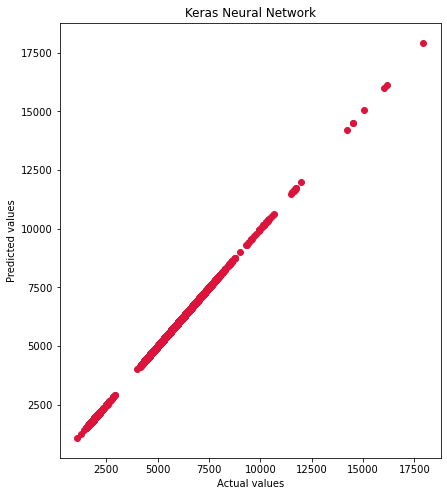

In [71]:
y_pred = y_pred.reshape(7136)
graph_plot(y_test,y_pred)

## Conclusion : 

- By completeing this project i came to know in
  - different kernal_initializer, why it is use?, in which case it is use?
  - different activation functions(linear and non linear)
  - different optimizers
  - different loss functions and it's mathematics
- how to derive different parameters of Neural Network, working of parameters, effect of parameters like batch_size, epoch value and how it will give optimised results
- Get knowledge of GridSearchCV and RandomizedSearchCV to select best batch_size, epoch value, validation split, learning rate
- for above given problame i get parameters batch_size : 20, epochs : 200, optimizer :'adam' by applying GridSearchCV algorithm

## If any Problame or Fault in my project then let me know on 
  gmail : kalathiaparth@gmail.com